# Capstone Project - Credit Card Fraud Detection

### Name     - Lucky Mishra 
### Track      -  Deep Learning Track
### Program - PG Diploma in Data Science December 2019
### Submission Date        - 04/01/2021

## Problem Statement: 
The problem statement chosen for this project is to predict fraudulent credit card transactions with the help of machine learning models.
In this project, you will analyse customer-level data which has been collected and analysed during a research collaboration of Worldline and the Machine Learning Group. 
The dataset is taken from the Kaggle website and it has a total of 2,84,807 transactions, out of which 492 are fraudulent. Since the dataset is highly imbalanced, so it needs to be handled before model building

## Business Problem Overview:

For many banks, retaining high profitable customers is the number one business goal. Banking fraud, however, poses a significant threat to this goal for different banks. In terms of substantial financial losses, trust and credibility, this is a concerning issue to both banks and customers alike.

It has been estimated by Nilson report that by 2020 the banking frauds would account to $30 billion worldwide. With the rise in digital payment channels, the number of fraudulent transactions is also increasing with new and different ways. 

In the banking industry, credit card fraud detection using machine learning is not just a trend but a necessity for them to put proactive monitoring and fraud prevention mechanisms in place. Machine learning is helping these institutions to reduce time-consuming manual reviews, costly chargebacks and fees, and denials of legitimate transactions


## Data source:
creditcard.csv from https://www.kaggle.com/mlg-ulb/creditcardfraud

#### The project pipeline can be briefly summarized in the following four steps:

#### Data Understanding: 
Here, you need to load the data and understand the features present in it. This would help you choose the features that you will need for your final model.

#### Exploratory data analytics (EDA): 
Normally, in this step, you need to perform univariate and bivariate analyses of the data, followed by feature transformations, if necessary. For the current data set, because Gaussian variables are used, you do not need to perform Z-scaling. However, you can check if there is any skewness in the data and try to mitigate it, as it might cause problems during the model-building phase.

#### Train/Test Split: 
Now you are familiar with the train/test split, which you can perform in order to check the performance of your models with unseen data. Here, for validation, you can use the k-fold cross-validation method. You need to choose an appropriate k value so that the minority class is correctly represented in the test folds.

#### Model-Building/Hyperparameter Tuning: 
This is the final step at which you can try different models and fine-tune their hyperparameters until you get the desired level of performance on the given dataset. You should try and see if you get a better model by the various sampling techniques.

#### Model Evaluation: 
Evaluate the models using appropriate evaluation metrics. Note that since the data is imbalanced it is is more important to identify which are fraudulent transactions accurately than the non-fraudulent. Choose an appropriate evaluation metric which reflects this business goal.

In [1]:
# Importing python libraries :rr

import numpy as np
import pandas as pd
import time

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


# import machine learning and stats libraries:

from sklearn.linear_model import Ridge, Lasso, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn import linear_model #import the package
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score

from scipy import stats
from scipy.stats import norm, skew
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

import sklearn
from sklearn import metrics
from sklearn.metrics import roc_curve, auc 
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import average_precision_score, precision_recall_curve

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
# Import:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

#install scikit-optimize
!pip install scikit-optimize
from skopt import BayesSearchCV


# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

Could not fetch URL https://pypi.org/simple/pip/: There was a problem confirming the ssl certificate: HTTPSConnectionPool(host='pypi.org', port=443): Max retries exceeded with url: /simple/pip/ (Caused by SSLError(SSLError(1, '[SSL: WRONG_VERSION_NUMBER] wrong version number (_ssl.c:852)'),)) - skipping


In [2]:
#Run on google colab
#from google.colab import drive
#drive.mount('/content/drive')
#df = pd.read_csv('/content/drive/MyDrive/Upgrad_Capstone/creditcard.csv')


Mounted at /content/drive


## Exploratory data analysis

In [2]:
#Read dataset from local drive

df = pd.read_csv('creditcard.csv')

df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
#observe the different feature type present in the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [4]:
df.shape

(284807, 31)

In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

No null values

In [7]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [8]:
df.groupby('Class')['Class'].count()/df['Class'].count()


Class
0    0.998273
1    0.001727
Name: Class, dtype: float64

Here we will observe the distribution of our classes

In [9]:
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100

In [10]:
print(normal_share)

print(fraud_share)

99.82725143693798
0.1727485630620034


The % of fradulant records are around 0.17%, hence this is the indication of highly class imbalance in the data

In [11]:
#I have observed that the time is given in relative format and it require further work 
#time_delta=pd.to_timedelta(df['Time'],unit='s')
#df['d_time']=(time_delta.dt.components.days).astype(int)
#df['h_time']= (time_delta.dt.components.hours).astype(int)
#df['m_time'] =(time_delta.dt.components.minutes).astype(int)

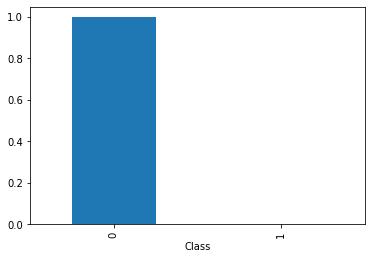

In [14]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations
bar_g=df.groupby('Class')['Class'].count()/df['Class'].count()
bar_g.plot.bar()

Text(0.5, 1, 'Distribution of classes w.r.t time')

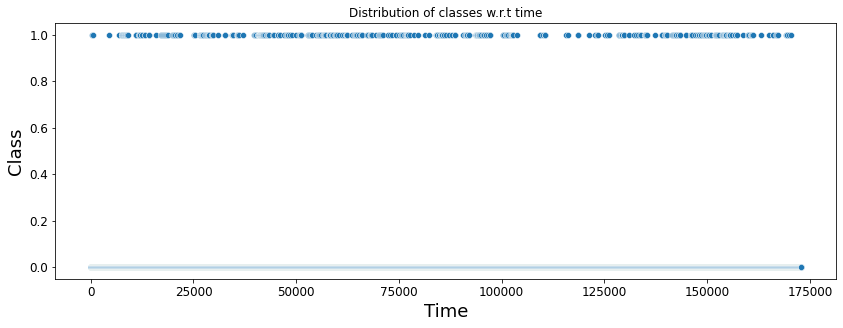

In [15]:
# Create a scatter plot to observe the distribution of classes with time

fig=plt.figure(figsize=(14,16))
plt.subplot(3,1,1)
sns.scatterplot(x=df['Time'],y='Class',data=df)
plt.xlabel('Time',size=18)
plt.ylabel('Class',size=18)
plt.tick_params(axis='x',labelsize=12)
plt.tick_params(axis='y',labelsize=12)

plt.title('Distribution of classes w.r.t time',size=12,y=1)

Text(0.5, 1, 'Distribution of classes w.r.t Amount')

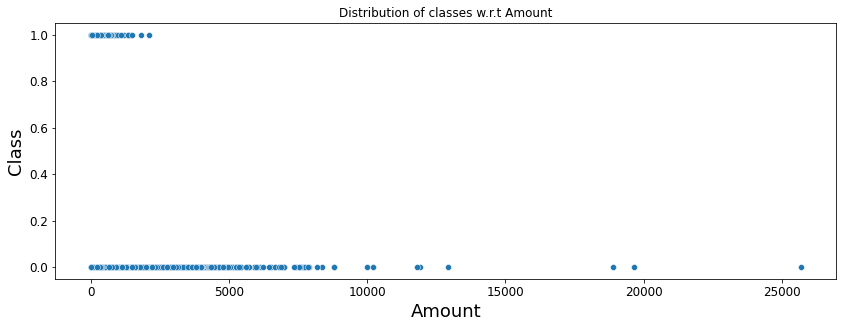

In [16]:
# Create a scatter plot to observe the distribution of classes with Amount
fig=plt.figure(figsize=(14,16))
cmap = sns.color_palette("husl", 9)

plt.subplot(3,1,1)
sns.scatterplot(x=df['Amount'],y='Class',palette=cmap, data=df)
plt.xlabel('Amount',size=18)
plt.ylabel('Class',size=18)
plt.tick_params(axis='x',labelsize=12)
plt.tick_params(axis='y',labelsize=12)

plt.title('Distribution of classes w.r.t Amount',size=12,y=1)


<code style="background:yellow;color:black"> Droping the column "Time" as it is not helping in the current analysis and also time series analysis is not required. </code>

In [12]:
# Drop unnecessary columns
df.drop('Time',axis=1,inplace=True)


In [13]:
#Check the correlation between predictor variables before dropping other variables
corr=df.corr()
corr

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
V1,1.000000e+00,4.697350e-17,-1.424390e-15,1.755316e-17,6.391162e-17,2.398071e-16,1.991550e-15,-9.490675e-17,2.169581e-16,7.433820e-17,...,-1.755072e-16,7.477367e-17,9.808705e-16,7.354269e-17,-9.805358e-16,-8.621897e-17,3.208233e-17,9.820892e-16,-0.227709,-0.101347
V2,4.697350e-17,1.000000e+00,2.512175e-16,-1.126388e-16,-2.039868e-16,5.024680e-16,3.966486e-16,-4.413984e-17,-5.728718e-17,-4.782388e-16,...,8.444409e-17,2.500830e-16,1.059562e-16,-8.142354e-18,-4.261894e-17,2.601622e-16,-4.478472e-16,-3.676415e-16,-0.531409,0.091289
V3,-1.424390e-15,2.512175e-16,1.000000e+00,-3.416910e-16,-1.436514e-15,1.431581e-15,2.168574e-15,3.433113e-16,-4.233770e-16,6.289267e-16,...,-2.971969e-17,4.648259e-16,2.115206e-17,-9.351637e-17,4.771164e-16,6.521501e-16,6.239832e-16,7.726948e-16,-0.210880,-0.192961
V4,1.755316e-17,-1.126388e-16,-3.416910e-16,1.000000e+00,-1.940929e-15,-2.712659e-16,1.556330e-16,5.195643e-16,3.859585e-16,6.055490e-16,...,-9.976950e-17,2.099922e-16,6.002528e-17,2.229738e-16,5.394585e-16,-6.179751e-16,-6.403423e-17,-5.863664e-17,0.098732,0.133447
V5,6.391162e-17,-2.039868e-16,-1.436514e-15,-1.940929e-15,1.000000e+00,7.926364e-16,-4.209851e-16,7.589187e-16,4.205206e-16,-6.601716e-16,...,-1.368701e-16,5.060029e-16,1.637596e-16,-9.286095e-16,5.625102e-16,9.144690e-16,4.465960e-16,-3.299167e-16,-0.386356,-0.094974
V6,2.398071e-16,5.024680e-16,1.431581e-15,-2.712659e-16,7.926364e-16,1.000000e+00,1.429426e-16,-1.707421e-16,1.114447e-16,2.850776e-16,...,-1.575903e-16,-3.362902e-16,-7.232186e-17,-1.261867e-15,1.081933e-15,-2.378414e-16,-2.623818e-16,4.813155e-16,0.215981,-0.043643
V7,1.991550e-15,3.966486e-16,2.168574e-15,1.556330e-16,-4.209851e-16,1.429426e-16,1.000000e+00,-8.691834e-17,7.933251e-16,3.043333e-17,...,1.938604e-16,-1.058131e-15,2.327911e-16,-2.589727e-17,1.174169e-15,-7.334507e-16,-5.886825e-16,-6.836764e-17,0.397311,-0.187257
V8,-9.490675e-17,-4.413984e-17,3.433113e-16,5.195643e-16,7.589187e-16,-1.707421e-16,-8.691834e-17,1.000000e+00,2.900829e-16,9.051847e-17,...,-2.412439e-16,5.475559e-16,3.897104e-16,-1.802967e-16,-1.390791e-16,-1.209975e-16,1.733633e-16,-4.484325e-16,-0.103079,0.019875
V9,2.169581e-16,-5.728718e-17,-4.233770e-16,3.859585e-16,4.205206e-16,1.114447e-16,7.933251e-16,2.900829e-16,1.000000e+00,-2.771761e-16,...,4.578389e-17,2.871855e-17,5.929286e-16,-2.346385e-16,1.099645e-15,-1.388725e-15,-2.287414e-16,9.146779e-16,-0.044246,-0.097733
V10,7.433820e-17,-4.782388e-16,6.289267e-16,6.055490e-16,-6.601716e-16,2.850776e-16,3.043333e-17,9.051847e-17,-2.771761e-16,1.000000e+00,...,8.089504e-16,-6.707598e-16,3.809732e-16,-4.032806e-17,-2.863813e-16,-2.554293e-16,-3.103239e-16,-1.515934e-16,-0.101502,-0.216883


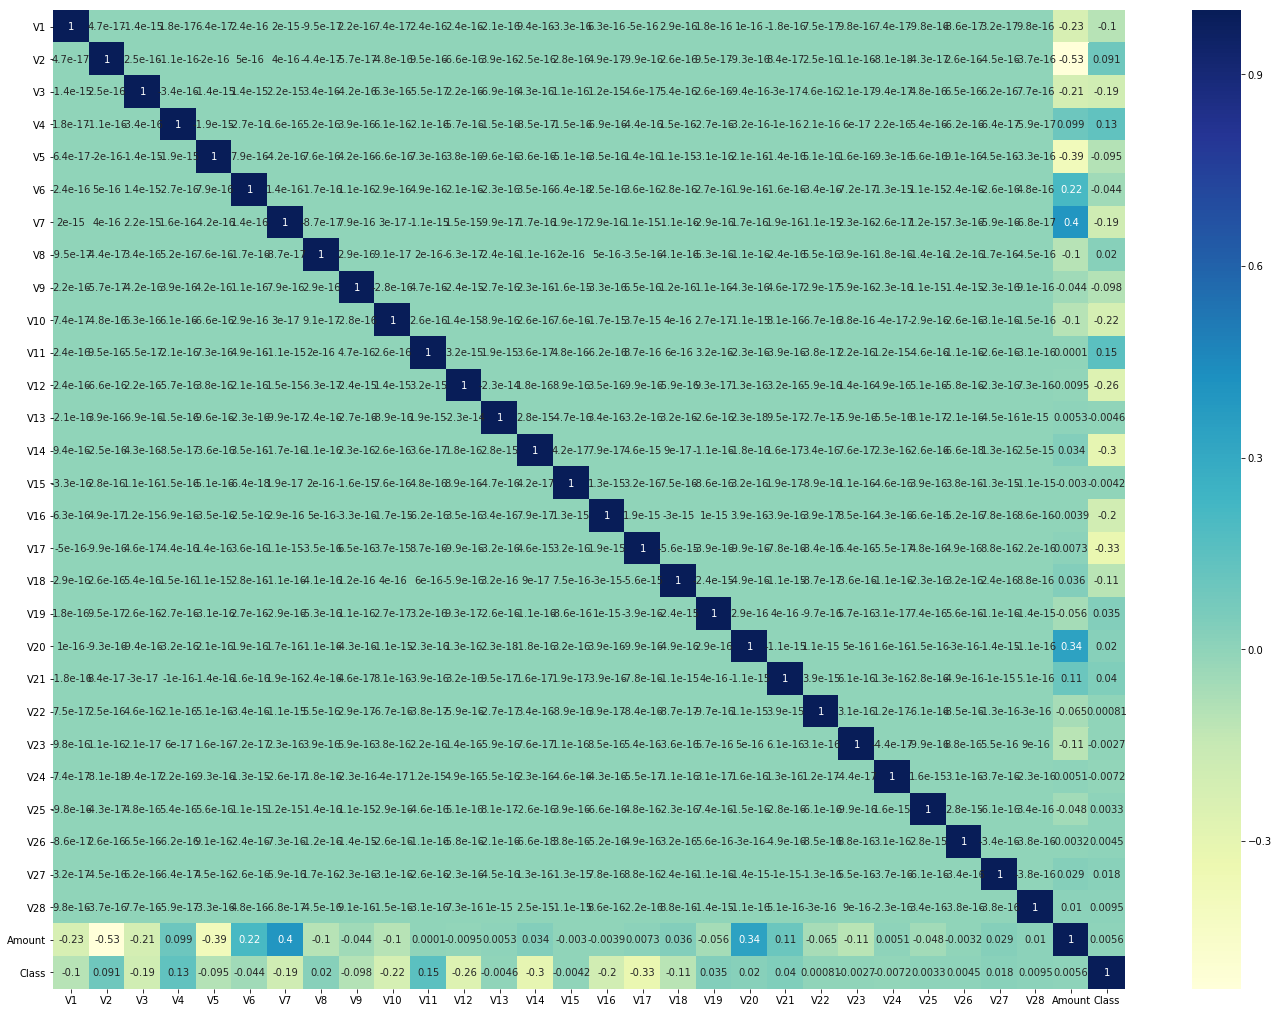

In [14]:
plt.figure(figsize=(24,18))

sns.heatmap(corr,cmap="YlGnBu",annot=True)
plt.show()

The independent variables are not appearing to be highly coorelated by the first look. Trying the see if there are variables which has more than 60% of correlation

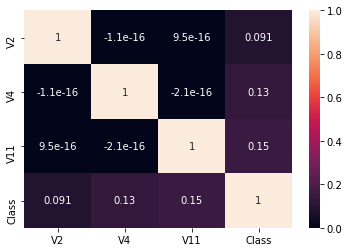

In [15]:
corr_60p = df[corr.index[abs(corr['Class']>0.06)]].corr()
sns.heatmap(corr_60p, annot=True)
plt.show()

### Splitting the data into train & test data

In [16]:
y= df['Class']#class variable
X= df.drop(['Class'],axis=1)

In [17]:
X.head(5)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0,stratify=y)#,test_size=0.20)

##### Preserve X_test & y_test to evaluate on the test data once you build the model

In [19]:
X_test_copy =X_test
y_test_copy = y_test

print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
369
123


The test copies are preserved but i may use the originals as i am not going to change them further

### Plotting the distribution of a variable

In [20]:
X.columns.values

get_cols = list(X.columns.values)
get_cols

['V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'Amount']

In [21]:
 df.Class

0         0
1         0
2         0
3         0
4         0
5         0
6         0
7         0
8         0
9         0
10        0
11        0
12        0
13        0
14        0
15        0
16        0
17        0
18        0
19        0
20        0
21        0
22        0
23        0
24        0
25        0
26        0
27        0
28        0
29        0
         ..
284777    0
284778    0
284779    0
284780    0
284781    0
284782    0
284783    0
284784    0
284785    0
284786    0
284787    0
284788    0
284789    0
284790    0
284791    0
284792    0
284793    0
284794    0
284795    0
284796    0
284797    0
284798    0
284799    0
284800    0
284801    0
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284807, dtype: int64

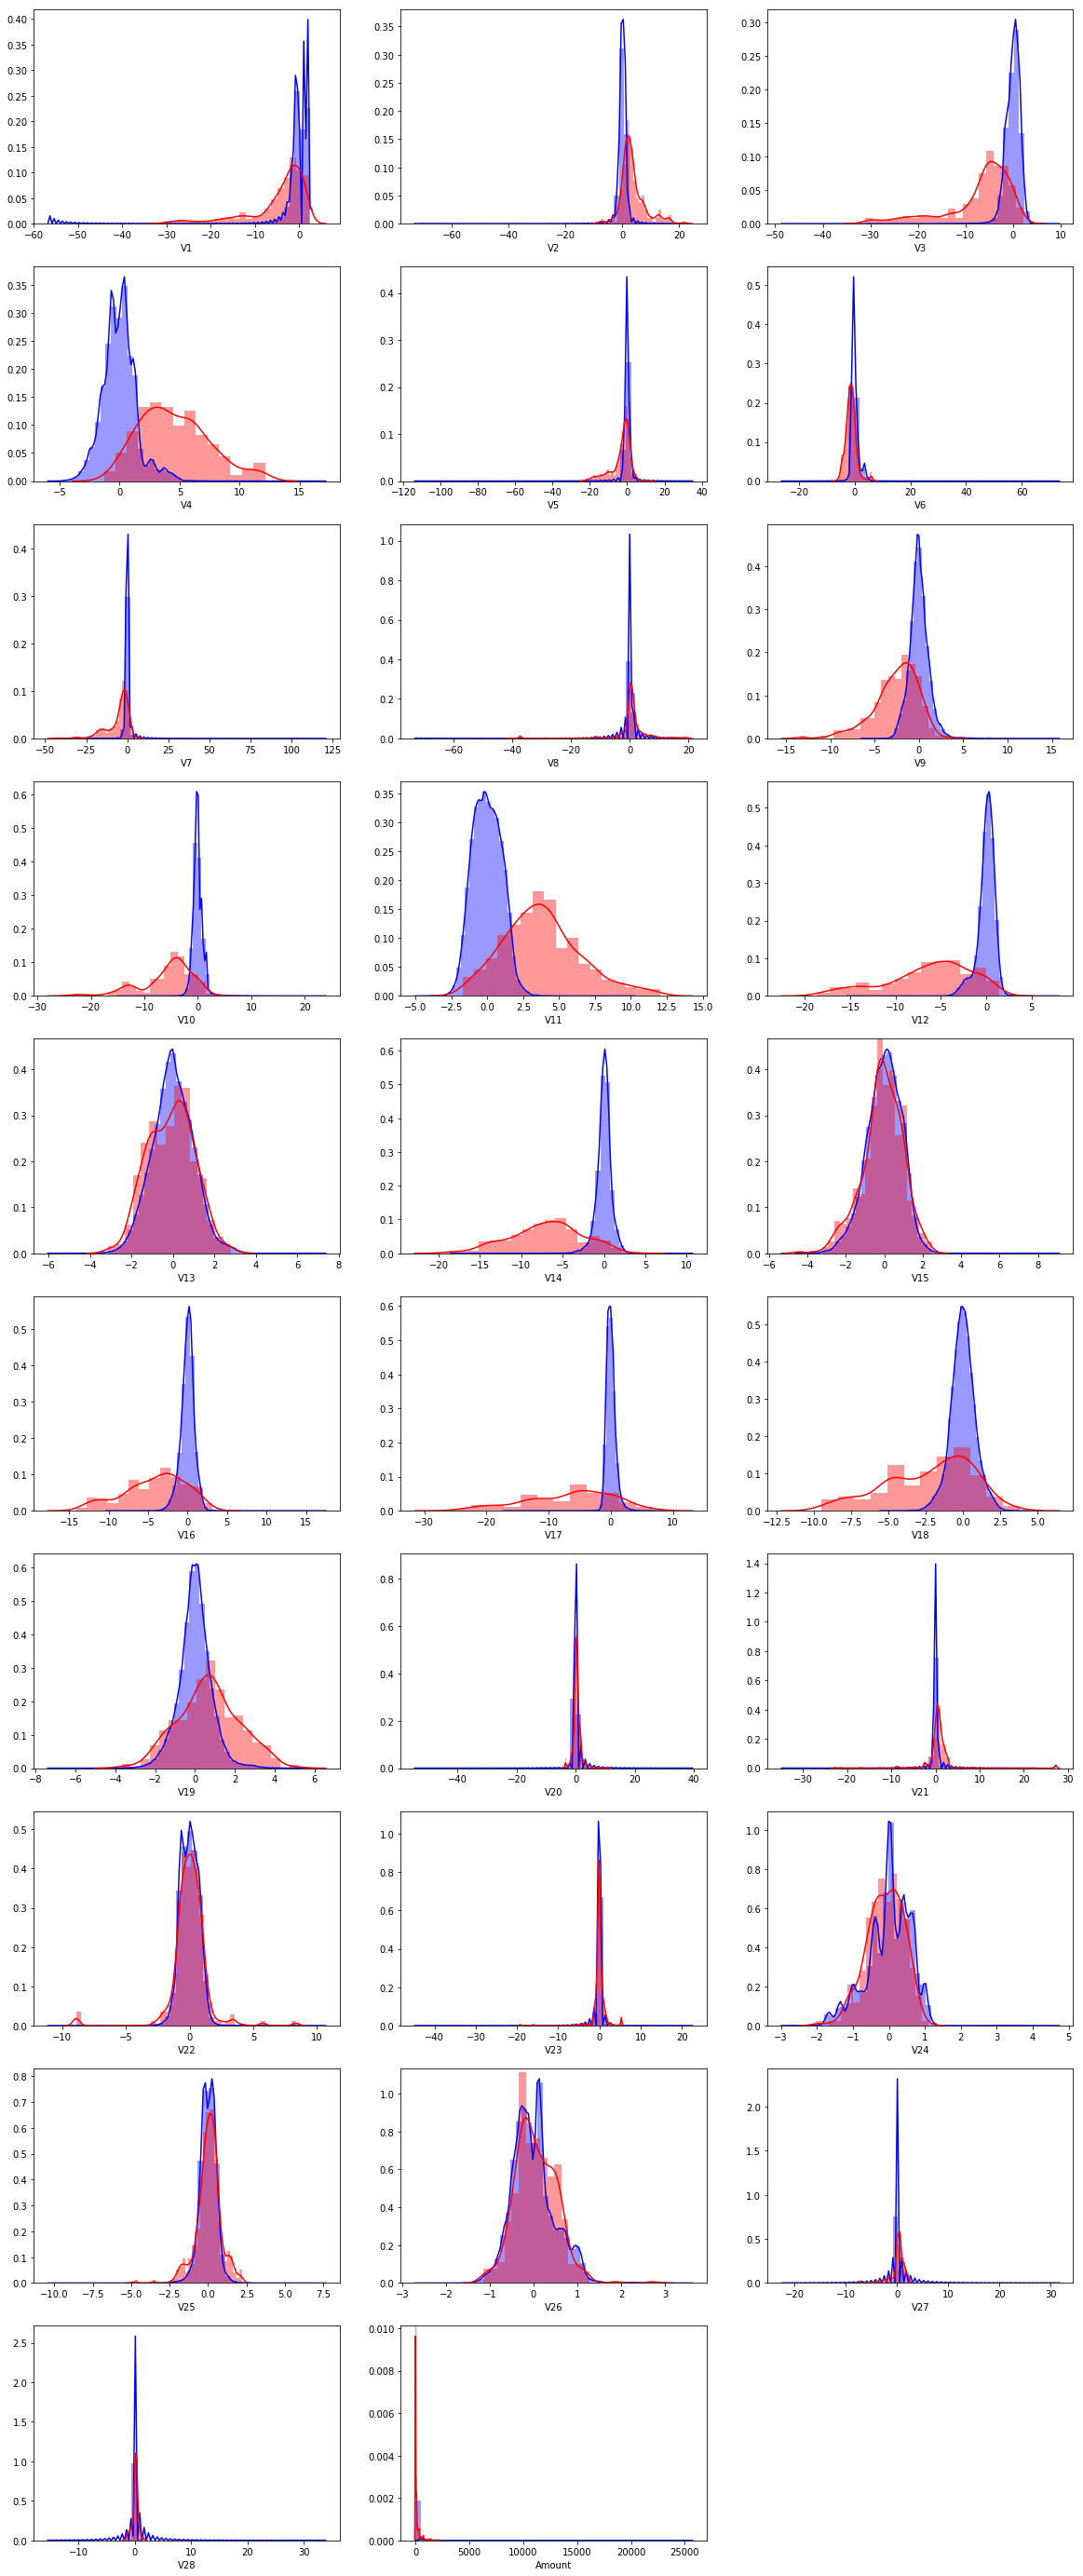

In [ ]:
# plot the histogram of a variable from the dataset to see the skewness

non_fraud_records = df.Class == 0
fraud_records = df.Class == 1

plt.figure(figsize=(20, 50))

for n, col in enumerate(get_cols):
  plt.subplot(10,3,n+1)

  sns.distplot(X[col][non_fraud_records], color='blue')
  sns.distplot(X[col][fraud_records], color='red') 

plt.show()


The skewness is evident for most of the variables between fradulent and non fradulent records.

### If there is skewness present in the distribution use:
- <b>Power Transformer</b> package present in the <b>preprocessing library provided by sklearn</b> to make distribution more gaussian

In [22]:
# - Apply : preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data
from sklearn.preprocessing import PolynomialFeatures, PowerTransformer
pt = PowerTransformer(copy=False)
pt.fit(X_train)                       ## Fit the PT on training data
X_train_pt = pt.transform(X_train)    ## Then apply on all data
X_test_pt = pt.transform(X_test)

In [23]:
X_train_pt_df = pd.DataFrame(data=X_train_pt,   columns=get_cols)
X_test_pt_df = pd.DataFrame(data=X_test_pt,   columns=get_cols)

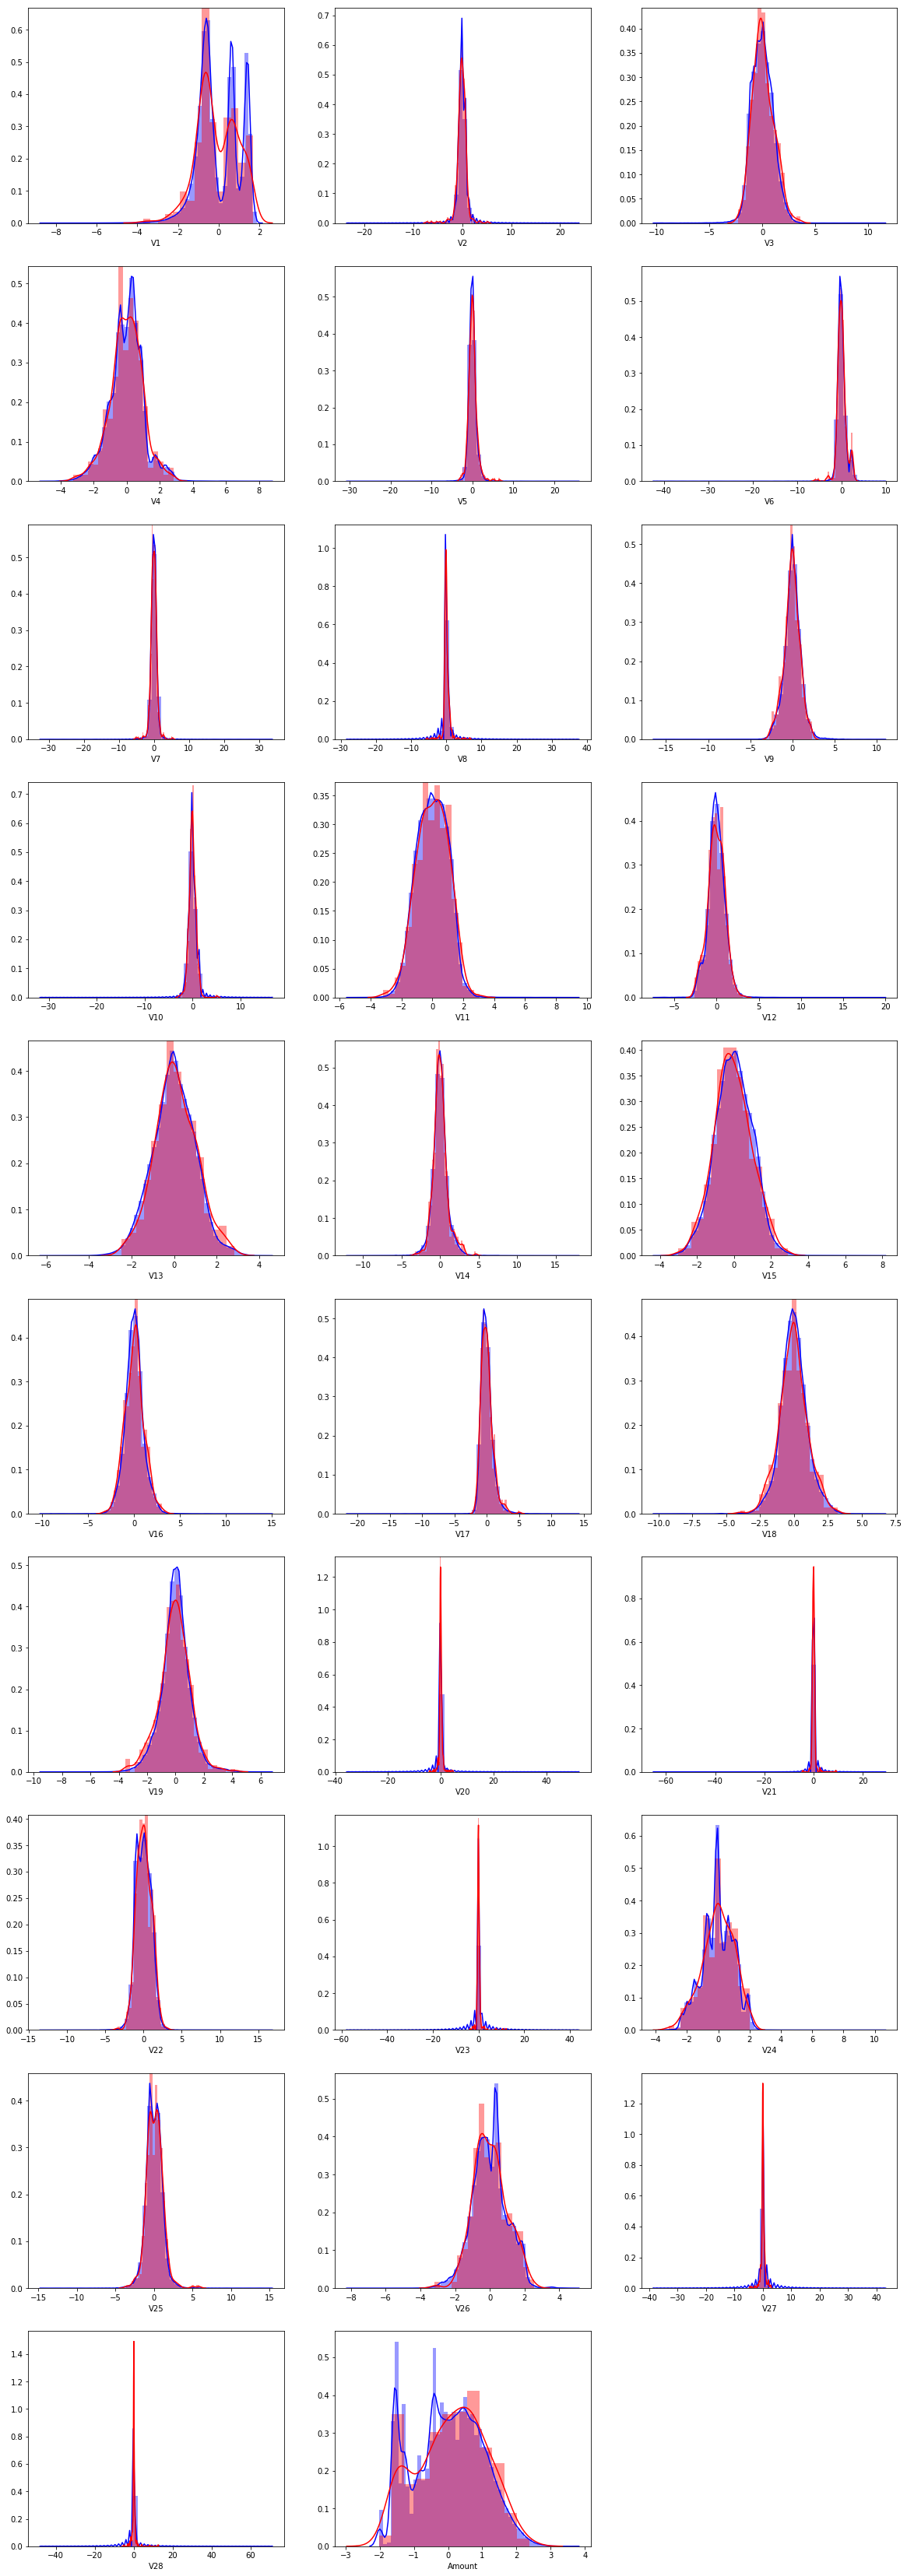

In [ ]:
# plot the histogram again to see the skewness on power transformed train dataset
plt.figure(figsize=(20, 60))
for n, col in enumerate(get_cols):
  plt.subplot(10,3,n+1)
  sns.distplot(X_train_pt_df[col][non_fraud_records], color='blue')
  sns.distplot(X_train_pt_df[col][fraud_records], color='red')
  #plt.title(col, fontsize=17)
plt.show()


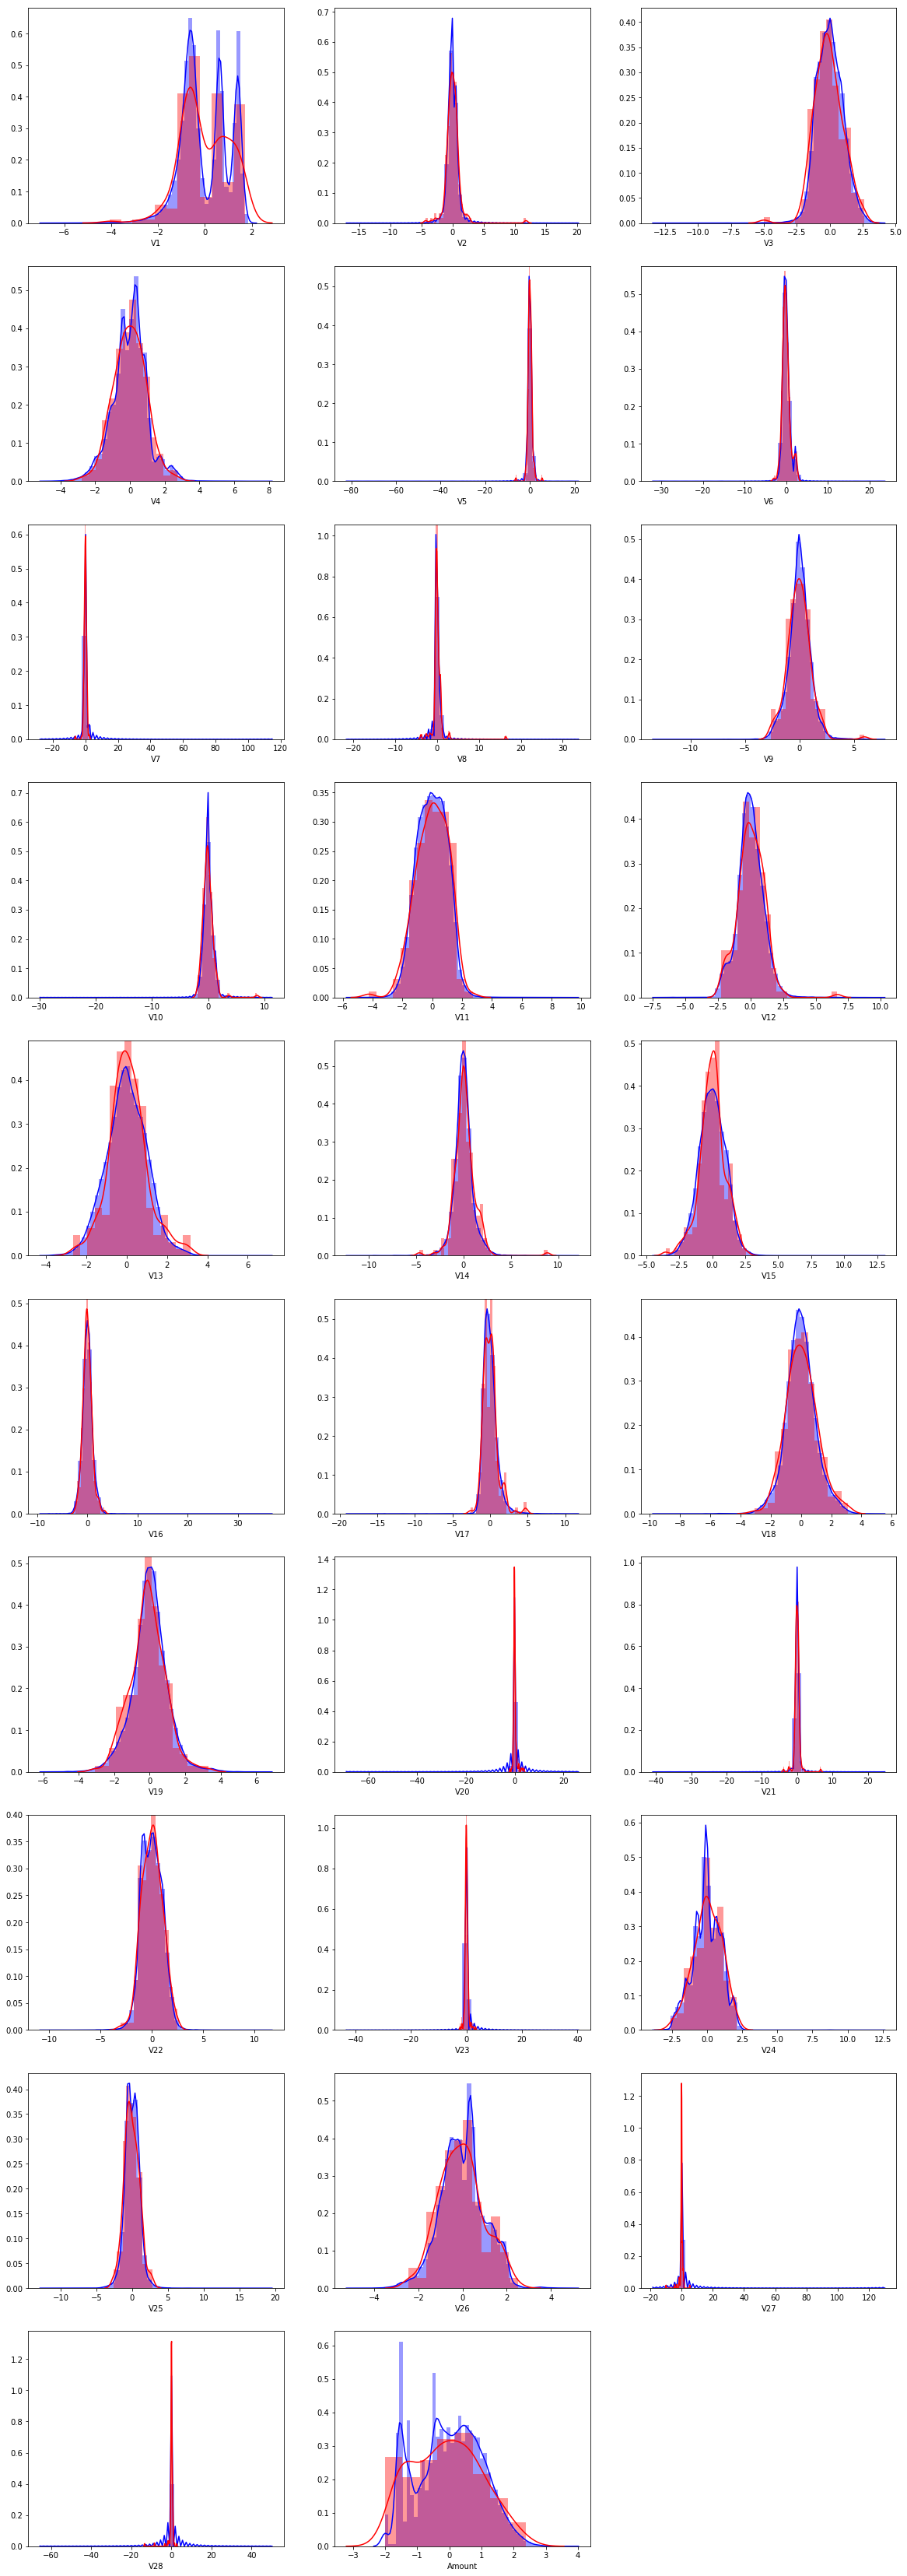

In [ ]:
# plot the histogram again to see the skewness on power transformed test dataset
plt.figure(figsize=(20, 60))
for n, col in enumerate(get_cols):
  plt.subplot(10,3,n+1)
  sns.distplot(X_test_pt_df[col][non_fraud_records], color='blue')
  sns.distplot(X_test_pt_df[col][fraud_records], color='red')
  #plt.title(col, fontsize=17)
plt.show()

The skewness is resolved after applying the power transformation on train and test dataset. Lets try to buid the model now on this data noting that the imbalance still exists in the dataset due to low percentage of non fradulant records.

## Model Building
- Build different models on the imbalanced dataset and see the result

**`I have moved the code below to common function otherwise i need to write it again for every model`**

In [24]:
# Logistic Regression
from sklearn import linear_model #import the package

#num_C = ______  #--> list of values
#cv_num =   #--> list of values

#### Common methods which i will be using for modelling the Imbalanced and balance data

In [25]:
#Create model functions for LR, KNN, SVM, Decision Tree, Random Forest, XGBoost

#Create a temporary dataframe to store results after each model run
df_Results = pd.DataFrame(columns=['Handle_data_imbalance','Model','Accuracy','roc_value','threshold'])

def Run_logistic_models(df_Results, DataImabalance, X_train,y_train, X_test, y_test ):
    # Logistic Regression
    from sklearn import linear_model
    from sklearn.model_selection import KFold
    from sklearn.metrics import roc_auc_score

    num_C = list(np.power(10.0, np.arange(-10, 10)))
    cv_num = KFold(n_splits=10, shuffle=True, random_state=42)

    searchCV_l2 = linear_model.LogisticRegressionCV(
          Cs= num_C,penalty='l2',scoring='roc_auc',cv=cv_num,random_state=42
          ,max_iter=10000,fit_intercept=True,solver='newton-cg',tol=10
      )

    searchCV_l1 = linear_model.LogisticRegressionCV(
          Cs=num_C,penalty='l1',scoring='roc_auc',cv=cv_num
          ,random_state=42,max_iter=10000,fit_intercept=True
          ,solver='liblinear',tol=10
      )
  
 
    searchCV_l2.fit(X_train, y_train)
    searchCV_l1.fit(X_train, y_train)
  
    print ('Max AUR_ROC for l1:', searchCV_l1.scores_[1].mean(axis=0).max())
    print ('Max AUR_ROC for l2:', searchCV_l2.scores_[1].mean(axis=0).max())
 
 
    print("Parameters for l1 regularisations")
    print(searchCV_l1.coef_)
    print(searchCV_l1.intercept_) 
    print(searchCV_l1.scores_) 

    print("Parameters for l2 regularisations")
    print(searchCV_l2.coef_)
    print(searchCV_l2.intercept_) 
    print(searchCV_l2.scores_) 



  #find predicted vallues
    y_pred_l1 = searchCV_l1.predict(X_test)
    y_pred_l2 = searchCV_l2.predict(X_test)

  

  #Find predicted probabilities
    y_pred_probs_l1 = searchCV_l1.predict_proba(X_test)[:,1] 
    y_pred_probs_l2 = searchCV_l2.predict_proba(X_test)[:,1] 
 

  # Accuaracy of L2/L1 models
    Accuracy_l1 = metrics.accuracy_score(y_pred=y_pred_l1, y_true=y_test)
    Accuracy_l2 = metrics.accuracy_score(y_pred=y_pred_l2, y_true=y_test)
  

    print("Accuarcy of Logistic model with l1 regularisation : {0}".format(Accuracy_l1))
    print("Confusion Matrix")
    gen_confusion_matrix(y_test, y_pred_l1)
    print("classification Report")
    print(classification_report(y_test, y_pred_l1))

    print("Accuarcy of Logistic model with l2 regularisation : {0}".format(Accuracy_l2))
    print("Confusion Matrix")
    gen_confusion_matrix(y_test, y_pred_l2)
    print("classification Report")
    print(classification_report(y_test, y_pred_l2))


  
    l2_roc_value = roc_auc_score(y_test, y_pred_probs_l2)
    print("l2 roc_value: {0}" .format(l2_roc_value))
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_probs_l2)
    threshold = thresholds[np.argmax(tpr-fpr)]
    print("l2 threshold: {0}".format(threshold))

    roc_auc = metrics.auc(fpr, tpr)
    print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
    plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
    plt.legend(loc=4)
    plt.show()
  
    df_Results = df_Results.append(pd.DataFrame({'Handle_data_imbalance': DataImabalance,'Model': 'Logistic Regression with L2 Regularisation','Accuracy': Accuracy_l2,'roc_value': l2_roc_value,'threshold': threshold}, index=[0]),ignore_index= True)

    l1_roc_value = roc_auc_score(y_test, y_pred_probs_l1)
    print("l1 roc_value: {0}" .format(l1_roc_value))
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_probs_l1)
    threshold = thresholds[np.argmax(tpr-fpr)]
    print("l1 threshold: {0}".format(threshold))

    roc_auc = metrics.auc(fpr, tpr)
    print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
    plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
    plt.legend(loc=4)
    plt.show()
  
    df_Results = df_Results.append(pd.DataFrame({'Handle_data_imbalance': DataImabalance,'Model': 'Logistic Regression with L1 Regularisation','Accuracy': Accuracy_l1,'roc_value': l1_roc_value,'threshold': threshold}, index=[0]),ignore_index= True)
    return df_Results

def buildAndRunKNNModels(df_Results,DataImabalance, X_train,y_train, X_test, y_test ):
  #Evaluate KNN  model
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.metrics import roc_auc_score
  #create KNN model and fit the model with train dataset
    knn = KNeighborsClassifier(n_neighbors = 5,n_jobs=16)
    knn.fit(X_train,y_train)
    score = knn.score(X_test,y_test)
    print("model score")
    print(score)
  
  #Accuracy
    y_pred = knn.predict(X_test)
    KNN_Accuracy = metrics.accuracy_score(y_pred=y_pred, y_true=y_test)
    print("Confusion Matrix")
    gen_confusion_matrix(y_test, y_pred)
    print("classification Report")
    print(classification_report(y_test, y_pred))


    knn_probs = knn.predict_proba(X_test)[:, 1]

  # Calculate roc auc
    knn_roc_value = roc_auc_score(y_test, knn_probs)
    print("KNN roc_value: {0}" .format(knn_roc_value))
    fpr, tpr, thresholds = metrics.roc_curve(y_test, knn_probs)
    threshold = thresholds[np.argmax(tpr-fpr)]
    print("KNN threshold: {0}".format(threshold))

    roc_auc = metrics.auc(fpr, tpr)
    print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
    plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
    plt.legend(loc=4)
    plt.show()
  
    df_Results = df_Results.append(pd.DataFrame({'Handle_data_imbalance': DataImabalance,'Model': 'KNN','Accuracy': score,'roc_value': knn_roc_value,'threshold': threshold}, index=[0]),ignore_index= True)

    return df_Results



def buildAndRunSVMModels(df_Results, DataImabalance, X_train,y_train, X_test, y_test ):
  #Evaluate SVM model with sigmoid kernel  model
    from sklearn.svm import SVC
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import roc_auc_score

    clf = SVC(kernel='sigmoid', random_state=42)
    clf.fit(X_train,y_train)
    y_pred_SVM = clf.predict(X_test)
    SVM_Score = accuracy_score(y_test,y_pred_SVM)
    print("accuracy_score : {0}".format(SVM_Score))
    print("Confusion Matrix")
    gen_confusion_matrix(y_test, y_pred_SVM)
    print("classification Report")
    print(classification_report(y_test, y_pred_SVM))



  # Run classifier
    classifier = SVC(kernel='sigmoid' , probability=True)
    svm_probs = classifier.fit(X_train, y_train).predict_proba(X_test)[:, 1]

  # Calculate roc auc
    roc_value = roc_auc_score(y_test, svm_probs)
  
    print("SVM roc_value: {0}" .format(roc_value))
    fpr, tpr, thresholds = metrics.roc_curve(y_test, svm_probs)
    threshold = thresholds[np.argmax(tpr-fpr)]
    print("SVM threshold: {0}".format(threshold))
    roc_auc = metrics.auc(fpr, tpr)
    print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
    plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
    plt.legend(loc=4)
    plt.show()
  
    df_Results = df_Results.append(pd.DataFrame({'Handle_data_imbalance': DataImabalance,'Model': 'SVM','Accuracy': SVM_Score,'roc_value': roc_value,'threshold': threshold}, index=[0]),ignore_index= True)

    return df_Results


def buildAndRunTreeModels(df_Results, DataImabalance, X_train,y_train, X_test, y_test ):
  #Evaluate Decision Tree model with 'gini' & 'entropy'
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.metrics import roc_auc_score
    criteria = ['gini', 'entropy'] 
    scores = {} 
    
    for c in criteria: 
        dt = DecisionTreeClassifier(criterion = c, random_state=42) 
        dt.fit(X_train, y_train) 
        y_pred = dt.predict(X_test)
        test_score = dt.score(X_test, y_test) 
        tree_preds = dt.predict_proba(X_test)[:, 1]
        tree_roc_value = roc_auc_score(y_test, tree_preds)
        scores = test_score 
        print(c + " score: {0}" .format(test_score))
        print("Confusion Matrix")
        gen_confusion_matrix(y_test, y_pred)
        print("classification Report")
        print(classification_report(y_test, y_pred))
        print(c + " tree_roc_value: {0}" .format(tree_roc_value))
        fpr, tpr, thresholds = metrics.roc_curve(y_test, tree_preds)
        threshold = thresholds[np.argmax(tpr-fpr)]
        print("Tree threshold: {0}".format(threshold))
        roc_auc = metrics.auc(fpr, tpr)
        print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
        plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
        plt.legend(loc=4)
        plt.show()
  
        df_Results = df_Results.append(pd.DataFrame({'Handle_data_imbalance': DataImabalance,'Model': 'Tree Model with {0} criteria'.format(c),'Accuracy': test_score,'roc_value': tree_roc_value,'threshold': threshold}, index=[0]),ignore_index= True)

    return df_Results
      
def buildAndRunRandomForestModels(df_Results, DataImabalance, X_train,y_train, X_test, y_test ):
  #Evaluate Random Forest model

    from sklearn.ensemble import RandomForestClassifier
    from sklearn.metrics import roc_auc_score

  # Create the model with 100 trees
    RF_model = RandomForestClassifier(n_estimators=100, 
                                bootstrap = True,
                                max_features = 'sqrt', random_state=42)
  # Fit on training data
    RF_model.fit(X_train, y_train)
    RF_test_score = RF_model.score(X_test, y_test)
    RF_model.predict(X_test)

    print('Model Accuracy: {0}'.format(RF_test_score))


  # Actual class predictions
    rf_predictions = RF_model.predict(X_test)

    print("Confusion Matrix")
    gen_confusion_matrix(y_test, rf_predictions)
    print("classification Report")
    print(classification_report(y_test, rf_predictions))

  # Probabilities for each class
    rf_probs = RF_model.predict_proba(X_test)[:, 1]

  # Calculate roc auc
    roc_value = roc_auc_score(y_test, rf_probs)

    print("Random Forest roc_value: {0}" .format(roc_value))
    fpr, tpr, thresholds = metrics.roc_curve(y_test, rf_probs)
    threshold = thresholds[np.argmax(tpr-fpr)]
    print("Random Forest threshold: {0}".format(threshold))
    roc_auc = metrics.auc(fpr, tpr)
    print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
    plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
    plt.legend(loc=4)
    plt.show()
  
    df_Results = df_Results.append(pd.DataFrame({'Handle_data_imbalance': DataImabalance,'Model': 'Random Forest','Accuracy': RF_test_score,'roc_value': roc_value,'threshold': threshold}, index=[0]),ignore_index= True)

    return df_Results

def Run_XGBoost_Models(df_Results, DataImabalance,X_train,y_train, X_test, y_test ):
  #Evaluate XGboost model
    from xgboost import XGBClassifier
    from sklearn.metrics import roc_auc_score
  # fit model no training data
    XGBmodel = XGBClassifier(random_state=42)
    XGBmodel.fit(X_train, y_train)
    y_pred = XGBmodel.predict(X_test)

    XGB_test_score = XGBmodel.score(X_test, y_test)
    print('Model Accuracy: {0}'.format(XGB_test_score))

    print("Confusion Matrix")
    gen_confusion_matrix(y_test, y_pred)
    print("classification Report")
    print(classification_report(y_test, y_pred))
  # Probabilities for each class
    XGB_probs = XGBmodel.predict_proba(X_test)[:, 1]

  # Calculate roc auc
    XGB_roc_value = roc_auc_score(y_test, XGB_probs)

    print("XGboost ROC value: {0}" .format(XGB_roc_value))
    fpr, tpr, thresholds = metrics.roc_curve(y_test, XGB_probs)
    threshold = thresholds[np.argmax(tpr-fpr)]
    print("XGBoost threshold: {0}".format(threshold))
    roc_cv_numauc = metrics.auc(fpr, tpr)
    roc_auc = metrics.auc(fpr, tpr)
    print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
    plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
    plt.legend(loc=4)
    plt.show()
  
    df_Results = df_Results.append(pd.DataFrame({'Handle_data_imbalance': DataImabalance,'Model': 'XGBoost','Accuracy': XGB_test_score,'roc_value': XGB_roc_value,'threshold': threshold}, index=[0]),ignore_index= True)

    return df_Results

def gen_confusion_matrix(y_test, pred_test):
    
    from sklearn.metrics import roc_auc_score

    cm = confusion_matrix(y_test, pred_test)
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Accent)
    classNames = ['Non-Fraudalent','Fraudalent']
    plt.title('Confusion Matrix on test data')
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames, rotation=45)
    plt.yticks(tick_marks, classNames)
    s = [['TN','FP'], ['FN', 'TP']]
  
    for i in range(2):
        for j in range(2):            
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]),fontsize=12)
    plt.show()

Logistic Regression with L1 & L2 Regularisation on Imbalance dataset
Max AUR_ROC for l1: 0.980198591172232
Max AUR_ROC for l2: 0.9790599051547467
Parameters for l1 regularisations
[[-0.06182166  0.0211067  -0.14643396  0.15289012 -0.03185143 -0.01851273
  -0.11247071 -0.05584887 -0.07032967 -0.15813276  0.12606625 -0.17177425
  -0.00368669 -0.28430658 -0.01282444 -0.11536834 -0.15321069 -0.03766279
   0.00483498  0.          0.01371781  0.00899257 -0.00340631 -0.00953699
   0.          0.00045047 -0.00964939  0.         -0.00665063]]
[-5.10122924]
{1: array([[0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
        0.5       , 0.5       , 0.87879902, 0.97042359, 0.98355741,
        0.98869642, 0.98574803, 0.97438397, 0.98538889, 0.96819224,
        0.97061364, 0.98491992, 0.98436825, 0.98894325, 0.97078766],
       [0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
        0.5       , 0.5       , 0.96783086, 0.98587502, 0.9932352 ,
        0.99037082, 0.99409154, 0

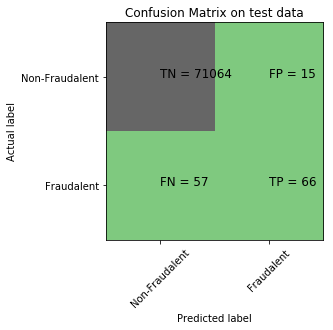

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.81      0.54      0.65       123

    accuracy                           1.00     71202
   macro avg       0.91      0.77      0.82     71202
weighted avg       1.00      1.00      1.00     71202

Accuarcy of Logistic model with l2 regularisation : 0.9992275497879273
Confusion Matrix


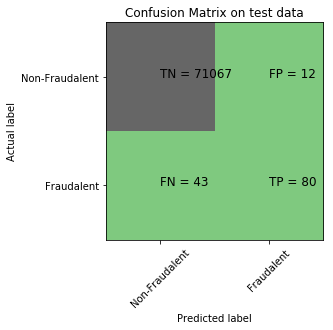

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.87      0.65      0.74       123

    accuracy                           1.00     71202
   macro avg       0.93      0.83      0.87     71202
weighted avg       1.00      1.00      1.00     71202

l2 roc_value: 0.9792046339827769
l2 threshold: 0.0024773976490833874
ROC for the test dataset 97.9%


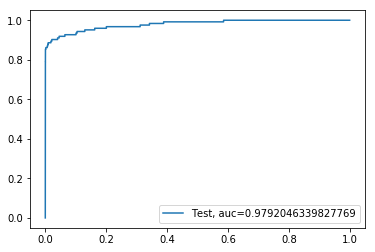

l1 roc_value: 0.9737468340791541
l1 threshold: 0.00982449725755214
ROC for the test dataset 97.4%


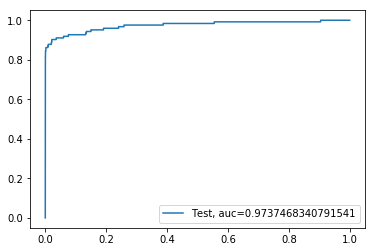

Run time taken by model: -- 155.51510334014893 seconds --
--------------------------------------------------------------------------------


In [ ]:
#Logistic Regression with L1 & L2 Regularisation
print("Logistic Regression with L1 & L2 Regularisation on Imbalance dataset")
start_time = time.time()
df_Results = Run_logistic_models(df_Results,"Power Transformer",X_train_pt_df,y_train, X_test_pt_df, y_test)
print("Run time taken by model: -- %s seconds --" % (time.time() - start_time))
print('-'*80 )


KNN Model on Imbalance dataset
model score
0.9994663071262043
Confusion Matrix


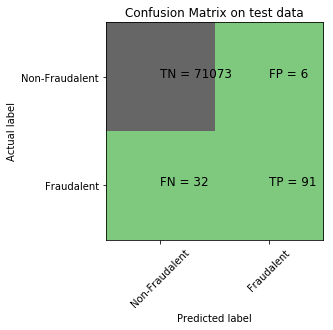

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.94      0.74      0.83       123

    accuracy                           1.00     71202
   macro avg       0.97      0.87      0.91     71202
weighted avg       1.00      1.00      1.00     71202

KNN roc_value: 0.9226479594386963
KNN threshold: 0.2
ROC for the test dataset 92.3%


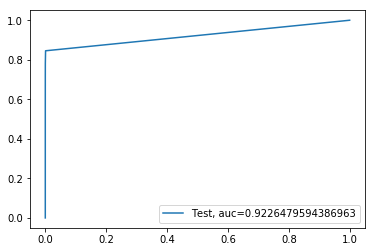

Time Taken by Model: --- 679.274950504303 seconds ---
--------------------------------------------------------------------------------


In [ ]:
print("KNN Model on Imbalance dataset")
start_time = time.time()
df_Results = buildAndRunKNNModels(df_Results,"Power Transformer",X_train_pt_df,y_train, X_test_pt_df, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

Decision Tree Models with  'gini' & 'entropy' criteria on Imbalance dataset  on Imbalance dataset
gini score: 0.9992696834358585
Confusion Matrix


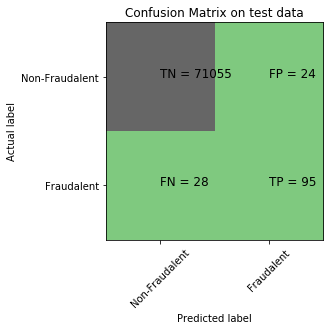

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.80      0.77      0.79       123

    accuracy                           1.00     71202
   macro avg       0.90      0.89      0.89     71202
weighted avg       1.00      1.00      1.00     71202

gini tree_roc_value: 0.8860100355530209
Tree threshold: 1.0
ROC for the test dataset 88.6%


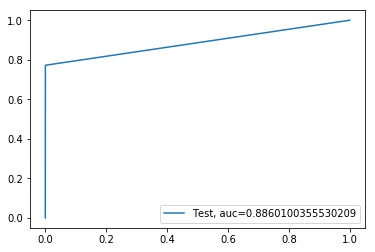

entropy score: 0.9992696834358585
Confusion Matrix


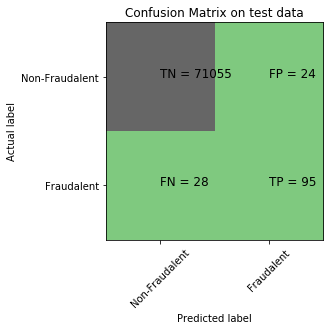

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.80      0.77      0.79       123

    accuracy                           1.00     71202
   macro avg       0.90      0.89      0.89     71202
weighted avg       1.00      1.00      1.00     71202

entropy tree_roc_value: 0.8860100355530209
Tree threshold: 1.0
ROC for the test dataset 88.6%


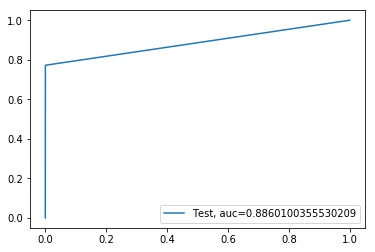

Time Taken by Model: --- 24.86176562309265 seconds ---
--------------------------------------------------------------------------------


In [ ]:
#Run Decision Tree Models with  'gini' & 'entropy' criteria
print("Decision Tree Models with  'gini' & 'entropy' criteria on Imbalance dataset  on Imbalance dataset")
start_time = time.time()
df_Results = buildAndRunTreeModels(df_Results,"Power Transformer",X_train_pt_df,y_train, X_test_pt_df, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

Random Forest Model  on Imbalance dataset
Model Accuracy: 0.9994663071262043
Confusion Matrix


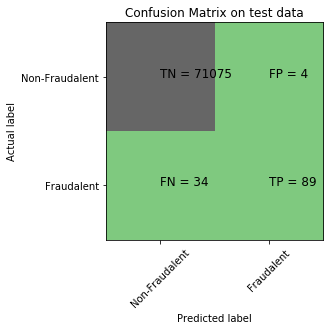

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.96      0.72      0.82       123

    accuracy                           1.00     71202
   macro avg       0.98      0.86      0.91     71202
weighted avg       1.00      1.00      1.00     71202

Random Forest roc_value: 0.9455030398444785
Random Forest threshold: 0.02
ROC for the test dataset 94.6%


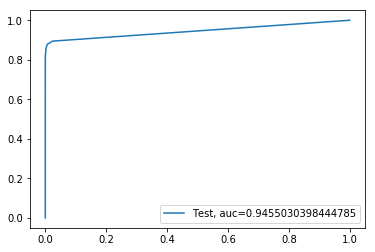

Time Taken by Model: --- 165.16328310966492 seconds ---
--------------------------------------------------------------------------------


In [ ]:
#Run Random Forest Model
print("Random Forest Model  on Imbalance dataset")
start_time = time.time()
df_Results = buildAndRunRandomForestModels(df_Results,"Power Transformer",X_train_pt_df,y_train, X_test_pt_df, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

Build XGBoost Model on Imbalance dataset
[21:48:50] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Model Accuracy: 0.9995646189713772
Confusion Matrix


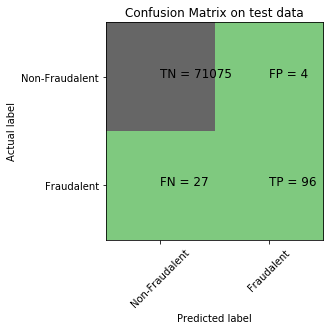

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.96      0.78      0.86       123

    accuracy                           1.00     71202
   macro avg       0.98      0.89      0.93     71202
weighted avg       1.00      1.00      1.00     71202

XGboost ROC value: 0.9775267802903834
XGBoost threshold: 0.00017762111383490264
ROC for the test dataset 97.8%


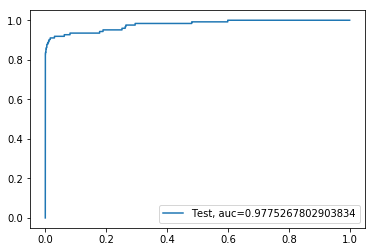

Run time taken by model: --- 53.29196333885193 seconds ---
--------------------------------------------------------------------------------


In [ ]:
print("Build XGBoost Model on Imbalance dataset")
start_time = time.time()
df_Results = Run_XGBoost_Models(df_Results,"Power Transformer",X_train_pt_df,y_train, X_test_pt_df, y_test)
print("Run time taken by model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

SVM Model with Sigmoid Kernel  on Imbalance dataset
accuracy_score : 0.9988483469565461
Confusion Matrix


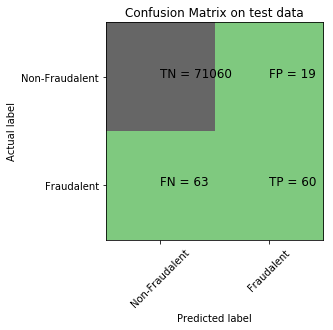

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.76      0.49      0.59       123

    accuracy                           1.00     71202
   macro avg       0.88      0.74      0.80     71202
weighted avg       1.00      1.00      1.00     71202

SVM roc_value: 0.6343892293436926
SVM threshold: 0.0242791958186557
ROC for the test dataset 63.4%


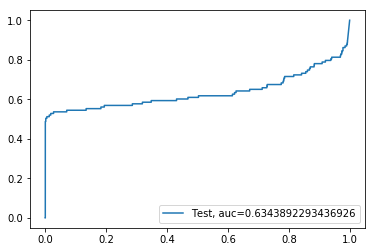

Time Taken by Model: --- 90.59654211997986 seconds ---


In [ ]:
#Run SVM Model with Sigmoid Kernel
print("SVM Model with Sigmoid Kernel  on Imbalance dataset")
start_time = time.time()
df_Results = buildAndRunSVMModels(df_Results,"Power Transformer",X_train_pt_df,y_train, X_test_pt_df, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))

In [ ]:
df_Results.head()

,Handle_data_imbalance,Model,Accuracy,roc_value,threshold
0,Power Transformer,Logistic Regression with L2 Regularisation,0.999228,0.979205,0.002477
1,Power Transformer,Logistic Regression with L1 Regularisation,0.998989,0.973747,0.009824
2,Power Transformer,KNN,0.999466,0.922648,0.200000
3,Power Transformer,Tree Model with gini criteria,0.999270,0.886010,1.000000
4,Power Transformer,Tree Model with entropy criteria,0.999270,0.886010,1.000000


Logistic Regression with L1 And L2 Regularisation 
Max auc_roc for l2: 0.9790599051547467
Max auc_roc for l1: 0.980198591172232
Parameters for l2 regularisations
[[-0.22704037 -0.18524919 -0.28495246  0.76307133 -0.05080254  0.09113221
  -0.22604145 -0.23738317 -0.17367632 -0.15779939  0.09293551 -0.55966073
  -0.16811004 -0.78747319 -0.12550922 -0.35596687  0.05913174  0.06991513
  -0.10881706 -0.03452878  0.14626105  0.26076457 -0.09000911  0.03896633
   0.07566528 -0.04937105 -0.06960124 -0.03449398  0.03606257]]
[-8.5535082]
{1: array([[0.86322651, 0.86316851, 0.86316851, 0.86316851, 0.86316974,
        0.86317962, 0.93456411, 0.97068399, 0.98286135, 0.98078921,
        0.98078921, 0.98078921, 0.98078921, 0.98078921, 0.98078921,
        0.98078921, 0.98078921, 0.98078921, 0.98078921, 0.98078921],
       [0.95246511, 0.95259169, 0.95259169, 0.95259169, 0.95259325,
        0.95260263, 0.97900239, 0.99156314, 0.99145375, 0.99460566,
        0.99460566, 0.99460566, 0.99460566, 0.994605

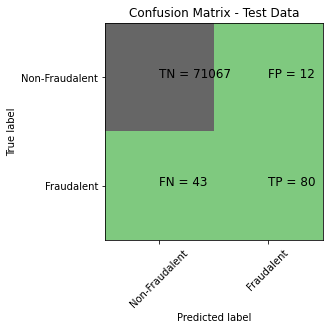

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.87      0.65      0.74       123

    accuracy                           1.00     71202
   macro avg       0.93      0.83      0.87     71202
weighted avg       1.00      1.00      1.00     71202

Accuarcy of Logistic model with l1 regularisation : 0.9989887924496503
Confusion Matrix


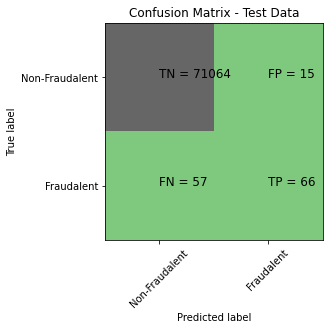

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.81      0.54      0.65       123

    accuracy                           1.00     71202
   macro avg       0.91      0.77      0.82     71202
weighted avg       1.00      1.00      1.00     71202

l2 roc_value: 0.9792046339827769
l2 threshold: 0.0024773976490840657
ROC for the test dataset 97.9%


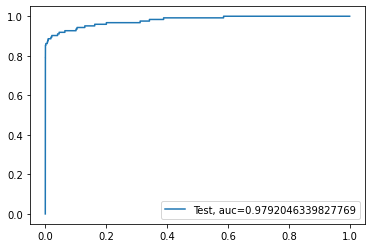

l1 roc_value: 0.9737468340791541
l1 threshold: 0.00982449725755214
ROC for the test dataset 97.4%


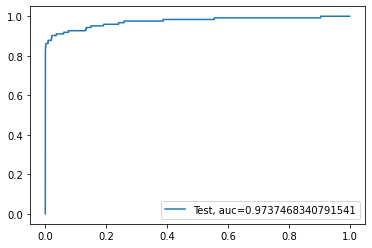

Time Taken by Model: --- 145.8246636390686 seconds ---
--------------------------------------------------------------------------------
KNN Model
model score
0.9994663071262043
Confusion Matrix


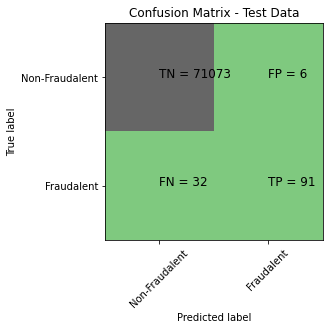

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.94      0.74      0.83       123

    accuracy                           1.00     71202
   macro avg       0.97      0.87      0.91     71202
weighted avg       1.00      1.00      1.00     71202

KNN roc_value: 0.9226479594386963
KNN threshold: 0.2
ROC for the test dataset 92.3%


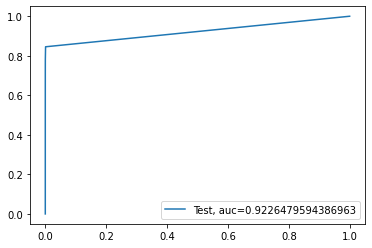

Time Taken by Model: --- 1475.6523718833923 seconds ---
--------------------------------------------------------------------------------
Decision Tree Models with  'gini' & 'entropy' criteria
gini score: 0.9992696834358585
Confusion Matrix


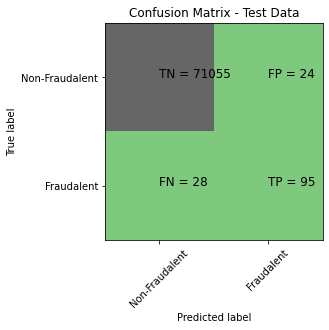

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.80      0.77      0.79       123

    accuracy                           1.00     71202
   macro avg       0.90      0.89      0.89     71202
weighted avg       1.00      1.00      1.00     71202

gini tree_roc_value: 0.8860100355530209
Tree threshold: 1.0
ROC for the test dataset 88.6%


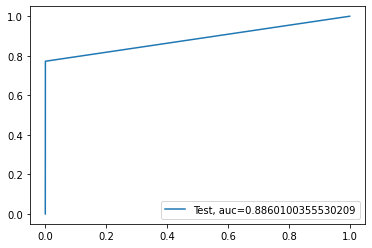

entropy score: 0.9992696834358585
Confusion Matrix


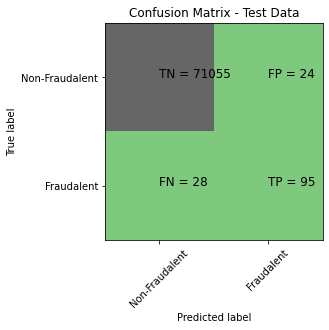

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.80      0.77      0.79       123

    accuracy                           1.00     71202
   macro avg       0.90      0.89      0.89     71202
weighted avg       1.00      1.00      1.00     71202

entropy tree_roc_value: 0.8860100355530209
Tree threshold: 1.0
ROC for the test dataset 88.6%


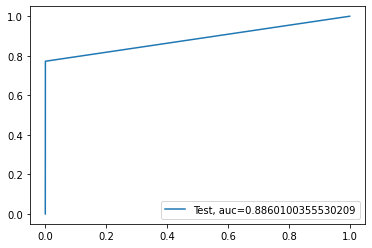

Time Taken by Model: --- 31.164163827896118 seconds ---
--------------------------------------------------------------------------------
Random Forest Model
Model Accuracy: 0.9994663071262043
Confusion Matrix


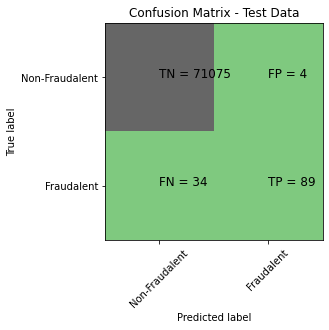

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.96      0.72      0.82       123

    accuracy                           1.00     71202
   macro avg       0.98      0.86      0.91     71202
weighted avg       1.00      1.00      1.00     71202

Random Forest roc_value: 0.9455030398444785
Random Forest threshold: 0.02
ROC for the test dataset 94.6%


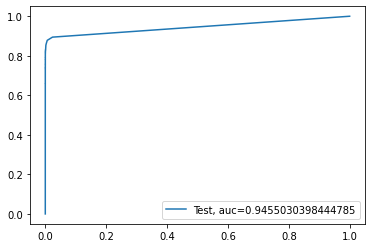

Time Taken by Model: --- 288.15043115615845 seconds ---
--------------------------------------------------------------------------------
XGBoost Model
Model Accuracy: 0.9993960843796522
Confusion Matrix


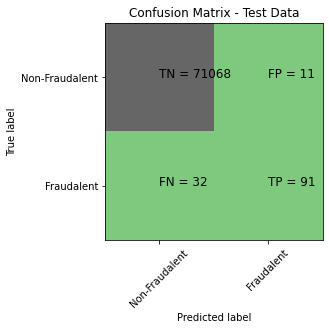

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.89      0.74      0.81       123

    accuracy                           1.00     71202
   macro avg       0.95      0.87      0.90     71202
weighted avg       1.00      1.00      1.00     71202

XGboost roc_value: 0.9827619377362896
XGBoost threshold: 0.002264364156872034
ROC for the test dataset 98.3%


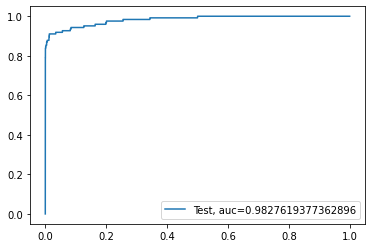

Time Taken by Model: --- 60.20820093154907 seconds ---
--------------------------------------------------------------------------------
SVM Model with Sigmoid Kernel
accuracy_score : 0.9988483469565461
Confusion Matrix


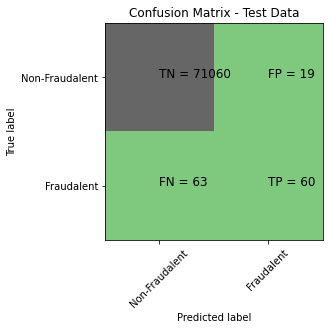

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.76      0.49      0.59       123

    accuracy                           1.00     71202
   macro avg       0.88      0.74      0.80     71202
weighted avg       1.00      1.00      1.00     71202

SVM roc_value: 0.6345714953372047
SVM threshold: 0.015355615935822835
ROC for the test dataset 63.5%


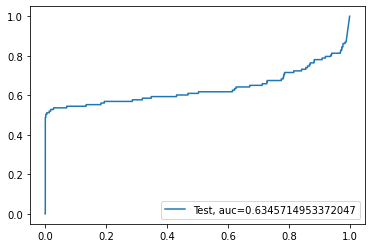

Time Taken by Model: --- 129.9616982936859 seconds ---


In [ ]:
import time
#Run Logistic Regression with L1 And L2 Regularisation
print("Logistic Regression with L1 And L2 Regularisation ")
start_time = time.time()
df_Results = Run_logistic_models(df_Results,"Power Transformer",X_train_pt_df,y_train, X_test_pt_df, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

#Run KNN Model
print("KNN Model")
start_time = time.time()
df_Results = buildAndRunKNNModels(df_Results,"Power Transformer",X_train_pt_df,y_train, X_test_pt_df, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run Decision Tree Models with  'gini' & 'entropy' criteria
print("Decision Tree Models with  'gini' & 'entropy' criteria")
start_time = time.time()
df_Results = buildAndRunTreeModels(df_Results,"Power Transformer",X_train_pt_df,y_train, X_test_pt_df, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run Random Forest Model
print("Random Forest Model")
start_time = time.time()
df_Results = buildAndRunRandomForestModels(df_Results,"Power Transformer",X_train_pt_df,y_train, X_test_pt_df, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run XGBoost Modela
print("XGBoost Model")
start_time = time.time()
df_Results = Run_XGBoost_Models(df_Results,"Power Transformer",X_train_pt_df,y_train, X_test_pt_df, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run SVM Model with Sigmoid Kernel
print("SVM Model with Sigmoid Kernel")
start_time = time.time()
df_Results = buildAndRunSVMModels(df_Results,"Power Transformer",X_train_pt_df,y_train, X_test_pt_df, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))

In [ ]:
df_Results.head()

#### perfom cross validation on the X_train & y_train to create:
- X_train_cv
- X_test_cv 
- y_train_cv
- y_test_cv 

In [ ]:
#perform cross validation

#perform hyperparameter tuning

#print the evaluation result by choosing a evaluation metric

#print the optimum value of hyperparameters

##### Perform cross validation with RepeatedKFold

In [26]:
#Lets perfrom RepeatedKFold and check the results
from sklearn.model_selection import RepeatedKFold
rkf = RepeatedKFold(n_splits=5, n_repeats=10, random_state=None)
# X is the feature set and y is the target
for train_index, test_index in rkf.split(X_train,y_train):#(X,y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train_cv, X_test_cv = X.iloc[train_index], X.iloc[test_index]
    y_train_cv, y_test_cv = y.iloc[train_index], y.iloc[test_index]


TRAIN: [     2      3      4 ... 213601 213603 213604] TEST: [     0      1     11 ... 213589 213595 213602]
TRAIN: [     0      1      3 ... 213602 213603 213604] TEST: [     2      5      8 ... 213587 213598 213600]
TRAIN: [     0      1      2 ... 213600 213602 213604] TEST: [     6      7     10 ... 213592 213601 213603]
TRAIN: [     0      1      2 ... 213601 213602 213603] TEST: [     3      9     18 ... 213596 213599 213604]
TRAIN: [     0      1      2 ... 213602 213603 213604] TEST: [     4     14     15 ... 213590 213593 213597]
TRAIN: [     1      3      5 ... 213601 213603 213604] TEST: [     0      2      4 ... 213590 213598 213602]
TRAIN: [     0      1      2 ... 213602 213603 213604] TEST: [     5     18     28 ... 213594 213599 213600]
TRAIN: [     0      2      4 ... 213602 213603 213604] TEST: [     1      3     11 ... 213585 213591 213593]
TRAIN: [     0      1      2 ... 213600 213601 213602] TEST: [     8     13     17 ... 213597 213603 213604]
TRAIN: [     0     

Logistic Regression with L1 And L2 Regularisation
Max AUR_ROC for l1: 0.9638196352700044
Max AUR_ROC for l2: 0.9780986176372777
Parameters for l1 regularisations
[[-0.05042554 -0.25249795 -0.27349905  0.05459249 -0.21240513  0.10948727
   0.31111778 -0.0860332  -0.08296352 -0.16706582 -0.05237281 -0.04483195
  -0.03602855 -0.14995106 -0.11156406 -0.09387745 -0.15450956  0.0693152
  -0.03691572  0.44513055  0.21241342  0.01927442  0.02571162 -0.02330476
  -0.28657504 -0.01899806 -0.00292842  0.10903354 -0.0072356 ]]
[-3.46461082]
{1: array([[0.5       , 0.5       , 0.5       , 0.5       , 0.46986394,
        0.46986394, 0.46986394, 0.72961353, 0.73993309, 0.88609861,
        0.90180213, 0.94270785, 0.92057875, 0.87951437, 0.88065084,
        0.88485695, 0.86867919, 0.96194147, 0.89291393, 0.80042078],
       [0.5       , 0.5       , 0.5       , 0.5       , 0.52863493,
        0.52863493, 0.52863493, 0.78983723, 0.80790785, 0.908199  ,
        0.92648455, 0.92815327, 0.93662583, 0.911362

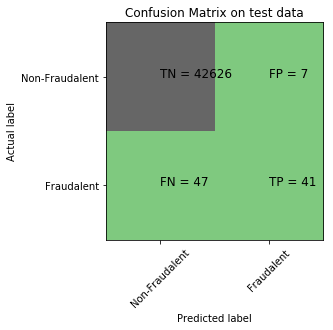

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     42633
           1       0.85      0.47      0.60        88

    accuracy                           1.00     42721
   macro avg       0.93      0.73      0.80     42721
weighted avg       1.00      1.00      1.00     42721

Accuarcy of Logistic model with l2 regularisation : 0.9989232461786943
Confusion Matrix


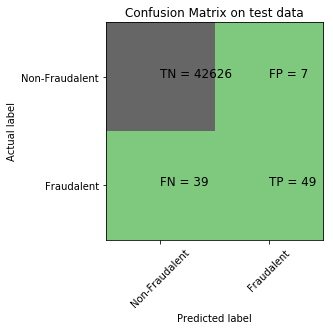

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     42633
           1       0.88      0.56      0.68        88

    accuracy                           1.00     42721
   macro avg       0.94      0.78      0.84     42721
weighted avg       1.00      1.00      1.00     42721

l2 roc_value: 0.9965357075078417
l2 threshold: 0.0013505378761341199
ROC for the test dataset 99.7%


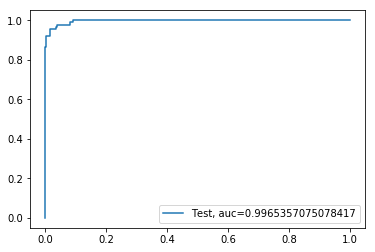

l1 roc_value: 0.8843906662146054
l1 threshold: 0.051712321441448245
ROC for the test dataset 88.4%


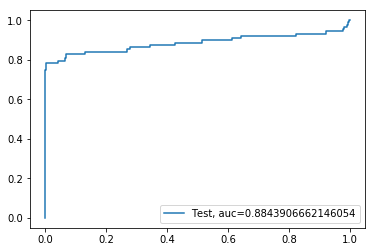

Time Taken by Model: --- 220.72599816322327 seconds ---
--------------------------------------------------------------------------------


In [ ]:
#Run Logistic Regression with L1 And L2 Regularisation
print("Logistic Regression with L1 And L2 Regularisation")
start_time = time.time()
df_Results = Run_logistic_models(df_Results,"RepeatedKFold Cross Validation", X_train_cv,y_train_cv, X_test_cv, y_test_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

KNN Model
model score
0.9992041384799045
Confusion Matrix


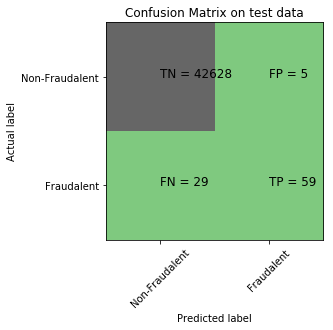

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     42633
           1       0.92      0.67      0.78        88

    accuracy                           1.00     42721
   macro avg       0.96      0.84      0.89     42721
weighted avg       1.00      1.00      1.00     42721

KNN roc_value: 0.8975586826679289
KNN threshold: 0.2
ROC for the test dataset 89.8%


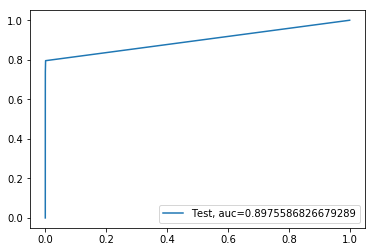

Time Taken by Model: --- 43.48612093925476 seconds ---
--------------------------------------------------------------------------------


In [ ]:
#Run KNN Model
print("KNN Model")
start_time = time.time()
df_Results = buildAndRunKNNModels(df_Results,"RepeatedKFold Cross Validation",X_train_cv,y_train_cv, X_test_cv, y_test_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

Decision Tree Models with  'gini' & 'entropy' criteria
gini score: 0.9989934692539969
Confusion Matrix


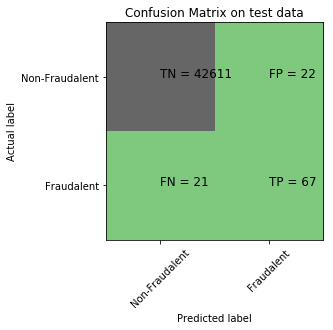

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     42633
           1       0.75      0.76      0.76        88

    accuracy                           1.00     42721
   macro avg       0.88      0.88      0.88     42721
weighted avg       1.00      1.00      1.00     42721

gini tree_roc_value: 0.8804238020909965
Tree threshold: 1.0
ROC for the test dataset 88.0%


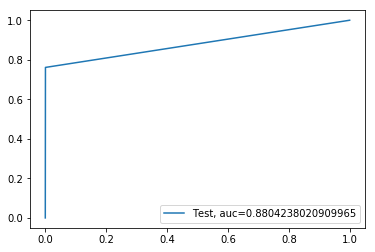

entropy score: 0.9990636923292994
Confusion Matrix


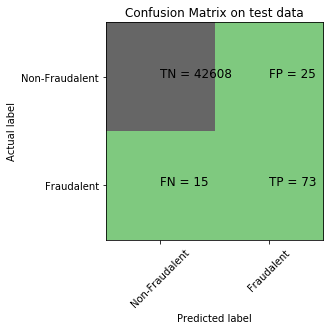

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     42633
           1       0.74      0.83      0.78        88

    accuracy                           1.00     42721
   macro avg       0.87      0.91      0.89     42721
weighted avg       1.00      1.00      1.00     42721

entropy tree_roc_value: 0.9144795271695209
Tree threshold: 1.0
ROC for the test dataset 91.4%


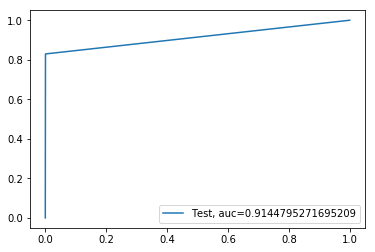

Time Taken by Model: --- 22.275396823883057 seconds ---
--------------------------------------------------------------------------------


In [ ]:
#Run Decision Tree Models with  'gini' & 'entropy' criteria
print("Decision Tree Models with  'gini' & 'entropy' criteria")
start_time = time.time()
df_Results = buildAndRunTreeModels(df_Results,"RepeatedKFold Cross Validation",X_train_cv,y_train_cv, X_test_cv, y_test_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

Random Forest Model
Model Accuracy: 0.9994148077058121
Confusion Matrix


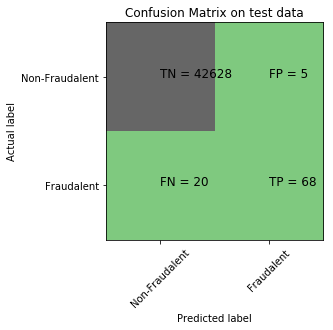

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     42633
           1       0.93      0.77      0.84        88

    accuracy                           1.00     42721
   macro avg       0.97      0.89      0.92     42721
weighted avg       1.00      1.00      1.00     42721

Random Forest roc_value: 0.9704411648680175
Random Forest threshold: 0.03
ROC for the test dataset 97.0%


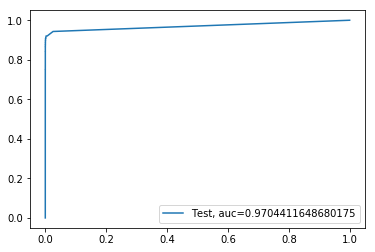

Time Taken by Model: --- 124.24113082885742 seconds ---
--------------------------------------------------------------------------------


In [ ]:

#Run Random Forest Model
print("Random Forest Model")
start_time = time.time()
df_Results = buildAndRunRandomForestModels(df_Results,"RepeatedKFold Cross Validation",X_train_cv,y_train_cv, X_test_cv, y_test_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

XGBoost Model
[21:58:44] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Model Accuracy: 0.9996254769317198
Confusion Matrix


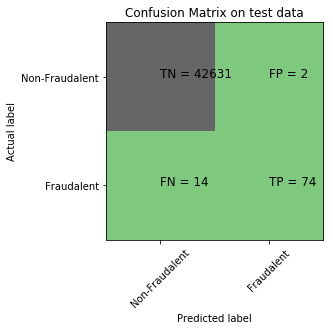

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     42633
           1       0.97      0.84      0.90        88

    accuracy                           1.00     42721
   macro avg       0.99      0.92      0.95     42721
weighted avg       1.00      1.00      1.00     42721

XGboost ROC value: 0.9839086452449342
XGBoost threshold: 0.0003697563079185784
ROC for the test dataset 98.4%


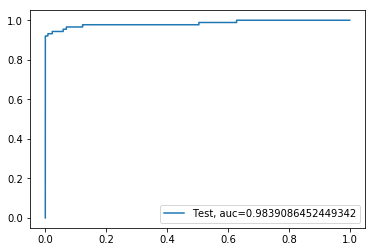

Time Taken by Model: --- 41.118229150772095 seconds ---
--------------------------------------------------------------------------------


In [ ]:

#Run XGBoost Modela
print("XGBoost Model")
start_time = time.time()
df_Results = Run_XGBoost_Models(df_Results,"RepeatedKFold Cross Validation",X_train_cv,y_train_cv, X_test_cv, y_test_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

SVM Model with Sigmoid Kernel
accuracy_score : 0.9972847077549682
Confusion Matrix


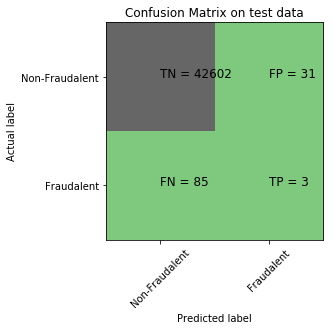

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     42633
           1       0.09      0.03      0.05        88

    accuracy                           1.00     42721
   macro avg       0.54      0.52      0.52     42721
weighted avg       1.00      1.00      1.00     42721

SVM roc_value: 0.6862079204542789
SVM threshold: 0.0037651517643998594
ROC for the test dataset 68.6%


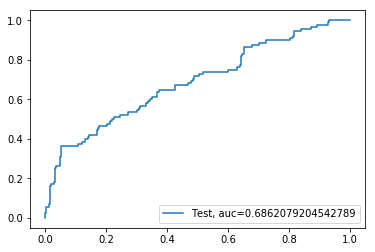

Time Taken by Model: --- 79.80397629737854 seconds ---


In [ ]:

#Run SVM Model with Sigmoid Kernel
print("SVM Model with Sigmoid Kernel")
start_time = time.time()
df_Results = buildAndRunSVMModels(df_Results,"RepeatedKFold Cross Validation",X_train_cv,y_train_cv, X_test_cv, y_test_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))

In [ ]:
df_Results

,Handle_data_imbalance,Model,Accuracy,roc_value,threshold
0,Power Transformer,Logistic Regression with L2 Regularisation,0.999228,0.979205,0.002477
1,Power Transformer,Logistic Regression with L1 Regularisation,0.998989,0.973747,0.009824
2,Power Transformer,KNN,0.999466,0.922648,0.200000
3,Power Transformer,Tree Model with gini criteria,0.999270,0.886010,1.000000
4,Power Transformer,Tree Model with entropy criteria,0.999270,0.886010,1.000000
5,Power Transformer,Random Forest,0.999466,0.945503,0.020000
6,Power Transformer,XGBoost,0.999565,0.977527,0.000178
7,Power Transformer,SVM,0.998848,0.634389,0.024279
8,RepeatedKFold Cross Validation,Logistic Regression with L2 Regularisation,0.998923,0.996536,0.001351
9,RepeatedKFold Cross Validation,Logistic Regression with L1 Regularisation,0.998736,0.884391,0.051712


***Best result comes out as XGBoost with Repeated KFold cross validation as it has provided best results with ROC_Value of 97.8% hence evaluating the XGBoost further based on imbalance data***

In [27]:
#Evaluate XGboost model
from xgboost import XGBClassifier
# fit model no training data
XGBmodel = XGBClassifier(random_state=42)
XGBmodel.fit(X_train_cv,y_train_cv)

coefficients = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(XGBmodel.feature_importances_))], axis = 1)
coefficients.columns = ['Feature','feature_importances']

[12:53:00] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


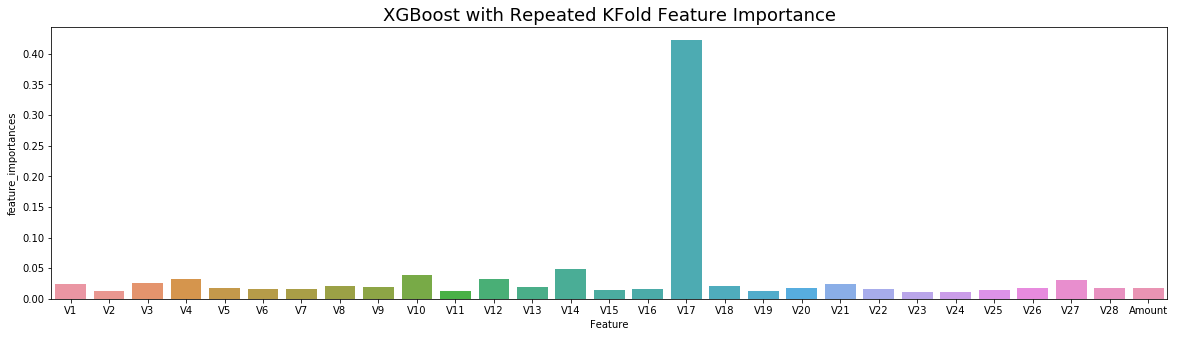

In [ ]:
plt.figure(figsize=(20,5))
sns.barplot(x='Feature', y='feature_importances', data=coefficients)
plt.title("XGBoost with Repeated KFold Feature Importance", fontsize=18)

plt.show()

#### Method 2 - Again Perform cross validation with StratifiedKFold

In [28]:
#Lets perfrom StratifiedKFold and check the results
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5, random_state=None)
# X is the feature set and y is the target
for train_index, test_index in skf.split(X,y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train_SKF_cv, X_test_SKF_cv = X.iloc[train_index], X.iloc[test_index]
    y_train_SKF_cv, y_test_SKF_cv = y.iloc[train_index], y.iloc[test_index]


TRAIN: [ 30473  30496  31002 ... 284804 284805 284806] TEST: [    0     1     2 ... 57017 57018 57019]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [ 30473  30496  31002 ... 113964 113965 113966]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [ 81609  82400  83053 ... 170946 170947 170948]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [150654 150660 150661 ... 227866 227867 227868]
TRAIN: [     0      1      2 ... 227866 227867 227868] TEST: [212516 212644 213092 ... 284804 284805 284806]


### Similarly explore other algorithms by building models like:
- KNN
- SVM
- Decision Tree
- Random Forest
- XGBoost

### Already done above for Repeated KFold, again doing it for StratifiedKFold 

Logistic Regression with L1 And L2 Regularisation
Max AUR_ROC for l1: 0.9718588688608811
Max AUR_ROC for l2: 0.9827474087162462
Parameters for l1 regularisations
[[-0.05667687 -0.23873268 -0.23823147  0.06281617 -0.2205112   0.11372499
   0.30260475 -0.07748346 -0.08164578 -0.1709487  -0.02399115 -0.06190037
  -0.02599999 -0.14696584 -0.08915628 -0.09803153 -0.14461915  0.06246659
  -0.03811404  0.45061381  0.19921848 -0.00345213  0.01988232 -0.01507602
  -0.2255661  -0.0114084   0.000544    0.08190583 -0.00694796]]
[-3.51940907]
{1: array([[0.5       , 0.5       , 0.5       , 0.5       , 0.48341269,
        0.48341269, 0.48341269, 0.78882734, 0.87846722, 0.94400368,
        0.94927708, 0.98702843, 0.96490113, 0.94876417, 0.95985769,
        0.94929286, 0.96122508, 0.99163223, 0.96930089, 0.92739326],
       [0.5       , 0.5       , 0.5       , 0.5       , 0.54612019,
        0.54612019, 0.54612019, 0.84131541, 0.89775107, 0.92946385,
        0.9433669 , 0.94532164, 0.95693216, 0.93226

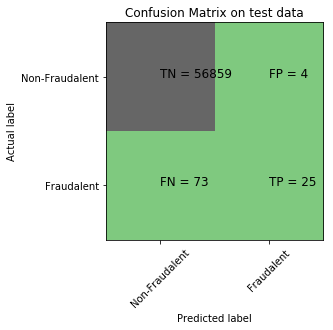

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.86      0.26      0.39        98

    accuracy                           1.00     56961
   macro avg       0.93      0.63      0.70     56961
weighted avg       1.00      1.00      1.00     56961

Accuarcy of Logistic model with l2 regularisation : 0.998771088990713
Confusion Matrix


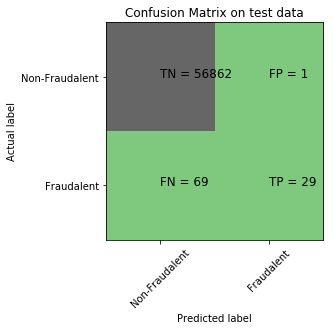

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.97      0.30      0.45        98

    accuracy                           1.00     56961
   macro avg       0.98      0.65      0.73     56961
weighted avg       1.00      1.00      1.00     56961

l2 roc_value: 0.9833428860702433
l2 threshold: 0.0015696133391542794
ROC for the test dataset 98.3%


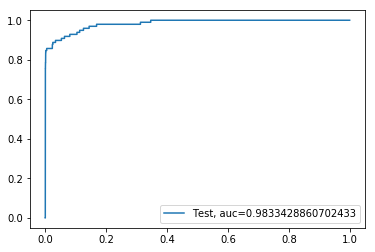

l1 roc_value: 0.9009118586850529
l1 threshold: 0.033186779619546906
ROC for the test dataset 90.1%


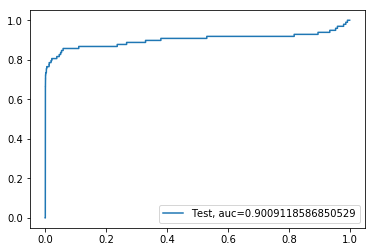

Time Taken by Model: --- 334.12480115890503 seconds ---
--------------------------------------------------------------------------------


In [ ]:
#Run Logistic Regression with L1 And L2 Regularisation
print("Logistic Regression with L1 And L2 Regularisation")
start_time = time.time()
df_Results = Run_logistic_models(df_Results,"StratifiedKFold Cross Validation", X_train_SKF_cv,y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )


KNN Model
model score
0.9991222064219378
Confusion Matrix


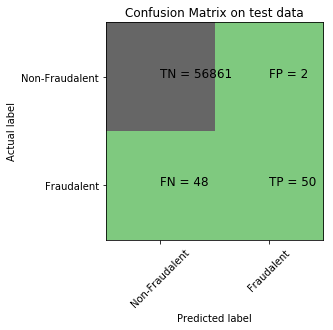

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.96      0.51      0.67        98

    accuracy                           1.00     56961
   macro avg       0.98      0.76      0.83     56961
weighted avg       1.00      1.00      1.00     56961

KNN roc_value: 0.8110050220957138
KNN threshold: 0.2
ROC for the test dataset 81.1%


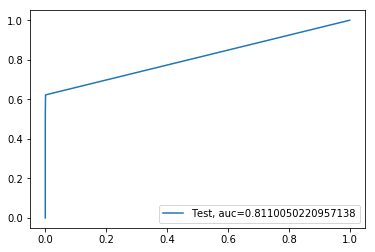

Time Taken by Model: --- 77.38912630081177 seconds ---
--------------------------------------------------------------------------------


In [ ]:
#Run KNN Model
print("KNN Model")
start_time = time.time()
df_Results = buildAndRunKNNModels(df_Results,"StratifiedKFold Cross Validation",X_train_SKF_cv,y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )


Decision Tree Models with  'gini' & 'entropy' criteria
gini score: 0.9989642035778866
Confusion Matrix


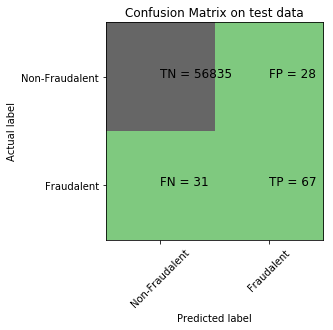

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.71      0.68      0.69        98

    accuracy                           1.00     56961
   macro avg       0.85      0.84      0.85     56961
weighted avg       1.00      1.00      1.00     56961

gini tree_roc_value: 0.8415905289010069
Tree threshold: 1.0
ROC for the test dataset 84.2%


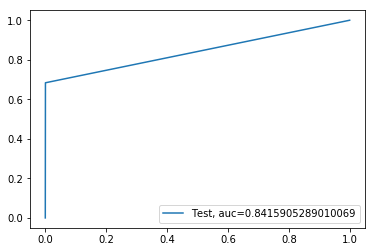

entropy score: 0.9990870946788153
Confusion Matrix


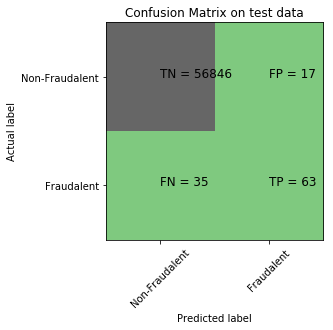

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.79      0.64      0.71        98

    accuracy                           1.00     56961
   macro avg       0.89      0.82      0.85     56961
weighted avg       1.00      1.00      1.00     56961

entropy tree_roc_value: 0.8212790893400429
Tree threshold: 1.0
ROC for the test dataset 82.1%


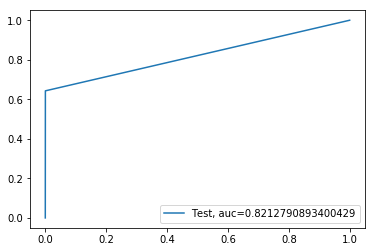

Time Taken by Model: --- 29.07547664642334 seconds ---
--------------------------------------------------------------------------------


In [ ]:
#Run Decision Tree Models with  'gini' & 'entropy' criteria
print("Decision Tree Models with  'gini' & 'entropy' criteria")
start_time = time.time()
df_Results = buildAndRunTreeModels(df_Results,"StratifiedKFold Cross Validation",X_train_SKF_cv,y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )


Random Forest Model
Model Accuracy: 0.9994557679816014
Confusion Matrix


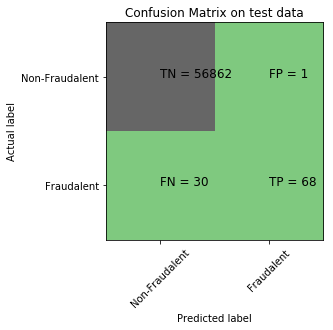

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.99      0.69      0.81        98

    accuracy                           1.00     56961
   macro avg       0.99      0.85      0.91     56961
weighted avg       1.00      1.00      1.00     56961

Random Forest roc_value: 0.9265156460910164
Random Forest threshold: 0.01
ROC for the test dataset 92.7%


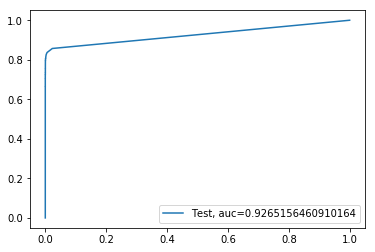

Time Taken by Model: --- 171.42104315757751 seconds ---
--------------------------------------------------------------------------------


In [ ]:
#Run Random Forest Model
print("Random Forest Model")
start_time = time.time()
df_Results = buildAndRunRandomForestModels(df_Results,"StratifiedKFold Cross Validation",X_train_SKF_cv,y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )


XGBoost Model
[22:11:38] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Model Accuracy: 0.9994557679816014
Confusion Matrix


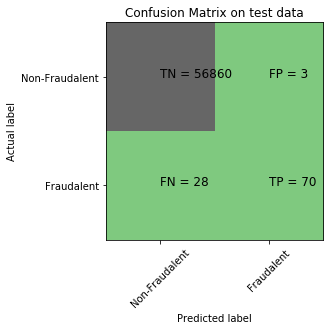

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.96      0.71      0.82        98

    accuracy                           1.00     56961
   macro avg       0.98      0.86      0.91     56961
weighted avg       1.00      1.00      1.00     56961

XGboost ROC value: 0.9842889479798743
XGBoost threshold: 2.8563774321810342e-05
ROC for the test dataset 98.4%


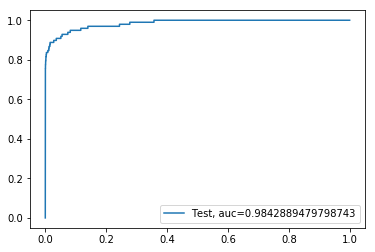

Time Taken by Model: --- 56.54683995246887 seconds ---
--------------------------------------------------------------------------------


In [ ]:
#Run XGBoost Modela
print("XGBoost Model")
start_time = time.time()
df_Results = Run_XGBoost_Models(df_Results,"StratifiedKFold Cross Validation",X_train_SKF_cv,y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )


SVM Model with Sigmoid Kernel
accuracy_score : 0.9982795245869981
Confusion Matrix


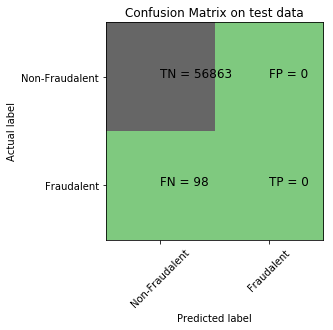

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.00      0.00      0.00        98

    accuracy                           1.00     56961
   macro avg       0.50      0.50      0.50     56961
weighted avg       1.00      1.00      1.00     56961

SVM roc_value: 0.40214557940370105
SVM threshold: 0.004343154210945596
ROC for the test dataset 40.2%


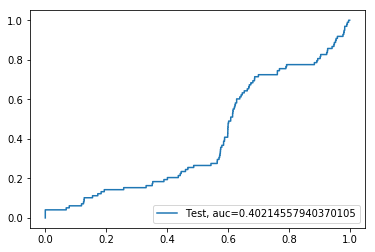

Time Taken by Model: --- 170.5616934299469 seconds ---


In [ ]:
#Run SVM Model with Sigmoid Kernel
print("SVM Model with Sigmoid Kernel")
start_time = time.time()
df_Results = buildAndRunSVMModels(df_Results,"StratifiedKFold Cross Validation",X_train_SKF_cv,y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))

In [ ]:
df_Results

,Handle_data_imbalance,Model,Accuracy,roc_value,threshold
0,Power Transformer,Logistic Regression with L2 Regularisation,0.999228,0.979205,0.002477
1,Power Transformer,Logistic Regression with L1 Regularisation,0.998989,0.973747,0.009824
2,Power Transformer,KNN,0.999466,0.922648,0.200000
3,Power Transformer,Tree Model with gini criteria,0.999270,0.886010,1.000000
4,Power Transformer,Tree Model with entropy criteria,0.999270,0.886010,1.000000
5,Power Transformer,Random Forest,0.999466,0.945503,0.020000
6,Power Transformer,XGBoost,0.999565,0.977527,0.000178
7,Power Transformer,SVM,0.998848,0.634389,0.024279
8,RepeatedKFold Cross Validation,Logistic Regression with L2 Regularisation,0.998923,0.996536,0.001351
9,RepeatedKFold Cross Validation,Logistic Regression with L1 Regularisation,0.998736,0.884391,0.051712


**As the results show Logistic Regression with L2 Regularisation for StratifiedFold cross validation provided best results**



#### Proceed with the model which shows the best result 
- Apply the best hyperparameter on the model
- Predict on the test dataset

**Have shifted the below code in common methods** 

In [ ]:
#clf = ___  #initialise the model with optimum hyperparameters
#clf.fit(X_train, y_train)
#print --> #print the evaluation score on the X_test by choosing the best evaluation metric

In [ ]:
# Logistic Regression
from sklearn import linear_model #import the package
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score

num_C = list(np.power(10.0, np.arange(-10, 10)))  #--> list of values
cv_num = KFold(n_splits=10, shuffle=True, random_state=42)  #--> list of values

searchCV_l2 = linear_model.LogisticRegressionCV(
          Cs= num_C
          ,penalty='l2'
          ,scoring='roc_auc'
          ,cv=cv_num
          ,random_state=42
          ,max_iter=10000
          ,fit_intercept=True
          ,solver='newton-cg'
          ,tol=10
      )

#searchCV.fit(X_train, y_train)
searchCV_l2.fit(X_train, y_train)
print ('Max auc_roc for l2:', searchCV_l2.scores_[1].mean(axis=0).max())


print("Parameters for l2 regularisations")
print(searchCV_l2.coef_)
print(searchCV_l2.intercept_) 
print(searchCV_l2.scores_) 


#find predicted vallues
y_pred_l2 = searchCV_l2.predict(X_test)


#Find predicted probabilities
y_pred_probs_l2 = searchCV_l2.predict_proba(X_test)[:,1] 


# Accuaracy of L2/L1 models
Accuracy_l2 = metrics.accuracy_score(y_pred=y_pred_l2, y_true=y_test)


print("Accuarcy of Logistic model with l2 regularisation : {0}".format(Accuracy_l2))



l2_roc_value = roc_auc_score(y_test, y_pred_probs_l2)
print("l2 roc_value: {0}" .format(l2_roc_value))
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_probs_l2)
threshold = thresholds[np.argmax(tpr-fpr)]
print("l2 threshold: {0}".format(threshold))

Max auc_roc for l2: 0.9790599051547467
Parameters for l2 regularisations
[[-0.22704037 -0.18524919 -0.28495246  0.76307133 -0.05080254  0.09113221
  -0.22604145 -0.23738317 -0.17367632 -0.15779939  0.09293551 -0.55966073
  -0.16811004 -0.78747319 -0.12550922 -0.35596687  0.05913174  0.06991513
  -0.10881706 -0.03452878  0.14626105  0.26076457 -0.09000911  0.03896633
   0.07566528 -0.04937105 -0.06960124 -0.03449398  0.03606257]]
[-8.5535082]
{1: array([[0.86322651, 0.86316851, 0.86316851, 0.86316851, 0.86316974,
        0.86317962, 0.93456411, 0.97068399, 0.98286135, 0.98078921,
        0.98078921, 0.98078921, 0.98078921, 0.98078921, 0.98078921,
        0.98078921, 0.98078921, 0.98078921, 0.98078921, 0.98078921],
       [0.95246511, 0.95259169, 0.95259169, 0.95259169, 0.95259325,
        0.95260263, 0.97900239, 0.99156314, 0.99145375, 0.99460566,
        0.99460566, 0.99460566, 0.99460566, 0.99460566, 0.99460566,
        0.99460566, 0.99460566, 0.99460566, 0.99460566, 0.99460566],
    

In [ ]:
searchCV_l2.coef_

array([[-0.22704037, -0.18524919, -0.28495246,  0.76307133, -0.05080254,
         0.09113221, -0.22604145, -0.23738317, -0.17367632, -0.15779939,
         0.09293551, -0.55966073, -0.16811004, -0.78747319, -0.12550922,
        -0.35596687,  0.05913174,  0.06991513, -0.10881706, -0.03452878,
         0.14626105,  0.26076457, -0.09000911,  0.03896633,  0.07566528,
        -0.04937105, -0.06960124, -0.03449398,  0.03606257]])

In [ ]:
coefficients = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(searchCV_l2.coef_))], axis = 1)
coefficients.columns = ['Feature','Importance Coefficient']
coefficients

,Feature,Importance Coefficient
0,V1,-0.227040
1,V2,-0.185249
2,V3,-0.284952
3,V4,0.763071
4,V5,-0.050803
5,V6,0.091132
6,V7,-0.226041
7,V8,-0.237383
8,V9,-0.173676
9,V10,-0.157799


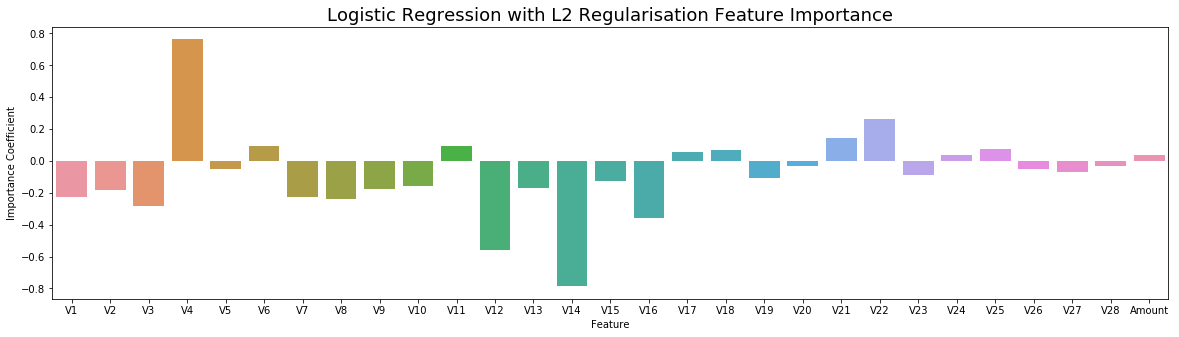

In [ ]:
plt.figure(figsize=(20,5))
sns.barplot(x='Feature', y='Importance Coefficient', data=coefficients)
plt.title("Logistic Regression with L2 Regularisation Feature Importance", fontsize=18)

plt.show()

*It is clear that V4, V11 and v5 has positive impact whereas V14, V12 and V10 seems to have negative impact on the predictaions**

## Model building with balancing Classes

##### Perform class balancing with :
- Random Oversampling
- SMOTE
- ADASYN

## Model Building
- Build different models on the balanced dataset and see the result

In [29]:
# Logistic Regression
from sklearn import linear_model #import the package

#num_C = ______  #--> list of values
#cv_num =   #--> list of values

#Let's try undersampling techniques first

Logistic Regression with L1 And L2 Regularisation
Max AUR_ROC for l1: 0.5
Max AUR_ROC for l2: 0.9793033814267778
Parameters for l1 regularisations
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0.]]
[0.]
{1: array([[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0

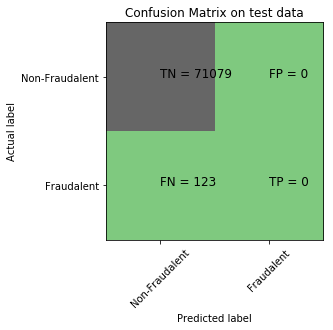

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.00      0.00      0.00       123

    accuracy                           1.00     71202
   macro avg       0.50      0.50      0.50     71202
weighted avg       1.00      1.00      1.00     71202

Accuarcy of Logistic model with l2 regularisation : 0.9975562484199882
Confusion Matrix


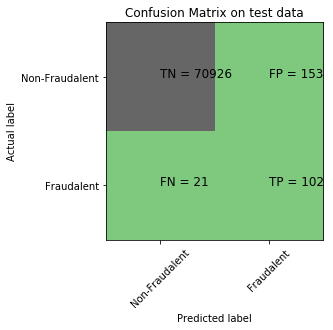

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.40      0.83      0.54       123

    accuracy                           1.00     71202
   macro avg       0.70      0.91      0.77     71202
weighted avg       1.00      1.00      1.00     71202

l2 roc_value: 0.9856673846356916
l2 threshold: 0.1921256866778592
ROC for the test dataset 98.6%


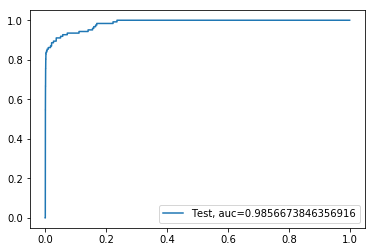

l1 roc_value: 0.5
l1 threshold: 1.5
ROC for the test dataset 50.0%


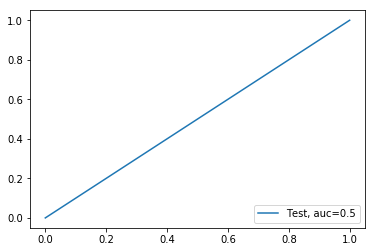

Time Taken by Model: --- 2.8975138664245605 seconds ---
--------------------------------------------------------------------------------


In [ ]:
#Run Logistic Regression with L1 And L2 Regularisation
print("Logistic Regression with L1 And L2 Regularisation")
start_time = time.time()
df_Results = Run_logistic_models(df_Results,"Random Undersampling", X_Under, y_Under , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

KNN Model
model score
0.9776551220471336
Confusion Matrix


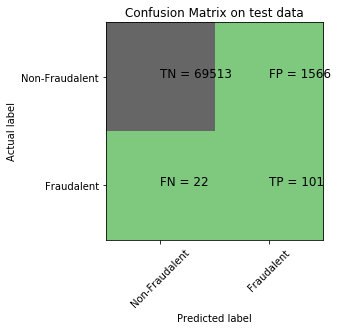

classification Report
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     71079
           1       0.06      0.82      0.11       123

    accuracy                           0.98     71202
   macro avg       0.53      0.90      0.55     71202
weighted avg       1.00      0.98      0.99     71202

KNN roc_value: 0.952955757346372
KNN threshold: 0.4
ROC for the test dataset 95.3%


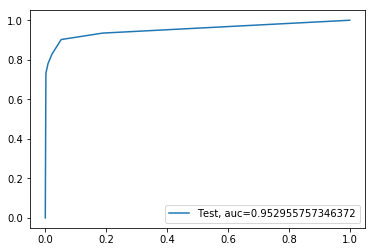

Time Taken by Model: --- 10.207740306854248 seconds ---
--------------------------------------------------------------------------------


In [ ]:
#Run KNN Model
print("KNN Model")
start_time = time.time()
df_Results = buildAndRunKNNModels(df_Results,"Random Undersampling",X_Under, y_Under , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

Decision Tree Models with  'gini' & 'entropy' criteria
gini score: 0.9495519788769978
Confusion Matrix


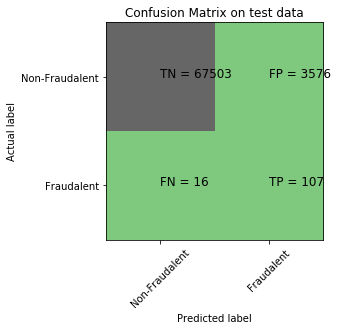

classification Report
              precision    recall  f1-score   support

           0       1.00      0.95      0.97     71079
           1       0.03      0.87      0.06       123

    accuracy                           0.95     71202
   macro avg       0.51      0.91      0.52     71202
weighted avg       1.00      0.95      0.97     71202

gini tree_roc_value: 0.9098042404895412
Tree threshold: 1.0
ROC for the test dataset 91.0%


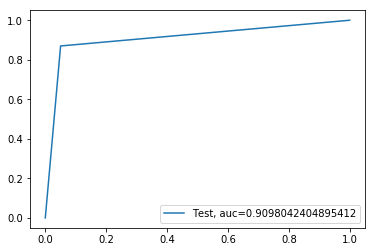

entropy score: 0.9507176764697621
Confusion Matrix


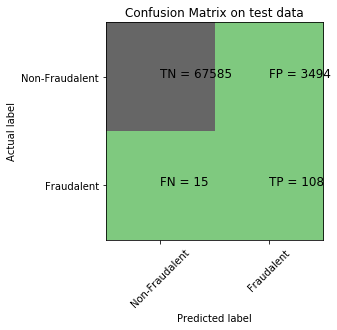

classification Report
              precision    recall  f1-score   support

           0       1.00      0.95      0.97     71079
           1       0.03      0.88      0.06       123

    accuracy                           0.95     71202
   macro avg       0.51      0.91      0.52     71202
weighted avg       1.00      0.95      0.97     71202

entropy tree_roc_value: 0.9144461041115707
Tree threshold: 1.0
ROC for the test dataset 91.4%


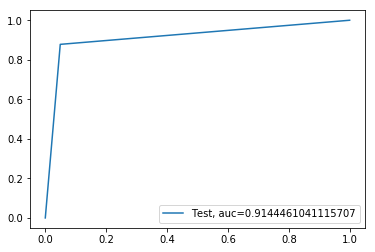

Time Taken by Model: --- 1.1147253513336182 seconds ---
--------------------------------------------------------------------------------


In [ ]:
#Run Decision Tree Models with  'gini' & 'entropy' criteria
print("Decision Tree Models with  'gini' & 'entropy' criteria")
start_time = time.time()
df_Results = buildAndRunTreeModels(df_Results, "Random Undersampling",X_Under, y_Under , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )


Random Forest Model
Model Accuracy: 0.9904075728209881
Confusion Matrix


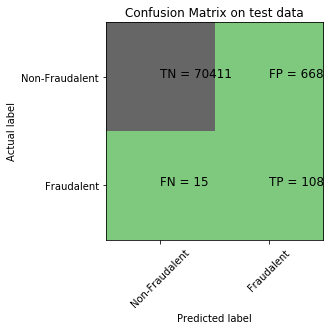

classification Report
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     71079
           1       0.14      0.88      0.24       123

    accuracy                           0.99     71202
   macro avg       0.57      0.93      0.62     71202
weighted avg       1.00      0.99      0.99     71202

Random Forest roc_value: 0.9772182377629288
Random Forest threshold: 0.58
ROC for the test dataset 97.7%


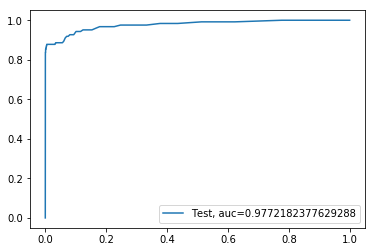

Time Taken by Model: --- 2.87298583984375 seconds ---
--------------------------------------------------------------------------------


In [ ]:
#Run Random Forest Model
print("Random Forest Model")
start_time = time.time()
df_Results = buildAndRunRandomForestModels(df_Results, "Random Undersampling",X_Under, y_Under , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )


XGBoost Model
[22:48:09] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Model Accuracy: 0.9846071739557878
Confusion Matrix


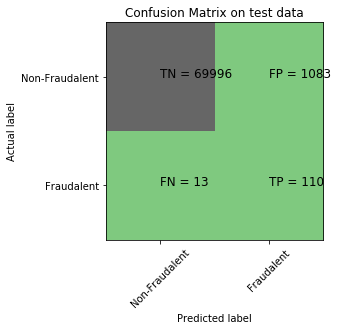

classification Report
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     71079
           1       0.09      0.89      0.17       123

    accuracy                           0.98     71202
   macro avg       0.55      0.94      0.58     71202
weighted avg       1.00      0.98      0.99     71202

XGboost ROC value: 0.9785601546979045
XGBoost threshold: 0.42581188678741455
ROC for the test dataset 97.9%


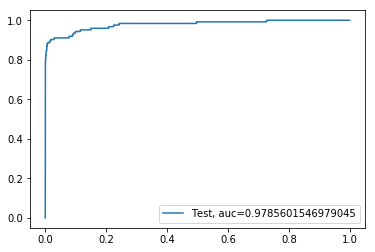

Time Taken by Model: --- 0.9676511287689209 seconds ---
--------------------------------------------------------------------------------


In [ ]:
#Run XGBoost Model
print("XGBoost Model")
start_time = time.time()
df_Results = Run_XGBoost_Models(df_Results, "Random Undersampling",X_Under, y_Under , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )


SVM Model with Sigmoid Kernel
accuracy_score : 0.6522288699755625
Confusion Matrix


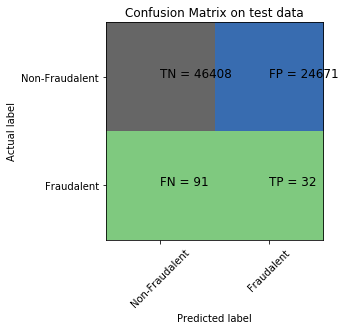

classification Report
              precision    recall  f1-score   support

           0       1.00      0.65      0.79     71079
           1       0.00      0.26      0.00       123

    accuracy                           0.65     71202
   macro avg       0.50      0.46      0.40     71202
weighted avg       1.00      0.65      0.79     71202

SVM roc_value: 0.544575216148481
SVM threshold: 0.33590848292609965
ROC for the test dataset 54.5%


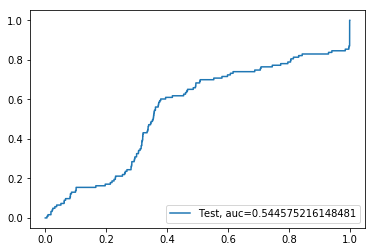

Time Taken by Model: --- 6.989248752593994 seconds ---


In [ ]:
#Run SVM Model with Sigmoid Kernel
print("SVM Model with Sigmoid Kernel")
start_time = time.time()
df_Results = buildAndRunSVMModels(df_Results, "Random Undersampling",X_Under, y_Under , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))

In [ ]:
df_Results

,Handle_data_imbalance,Model,Accuracy,roc_value,threshold
0,Random Undersampling,Logistic Regression with L2 Regularisation,0.997556,0.985667,0.192126
1,Random Undersampling,Logistic Regression with L1 Regularisation,0.998273,0.500000,1.500000
2,Random Undersampling,KNN,0.977655,0.952956,0.400000
3,Random Undersampling,Tree Model with gini criteria,0.949552,0.909804,1.000000
4,Random Undersampling,Tree Model with entropy criteria,0.950718,0.914446,1.000000
5,Random Undersampling,Random Forest,0.990408,0.977218,0.580000
6,Random Undersampling,XGBoost,0.984607,0.978560,0.425812
7,Random Undersampling,SVM,0.652229,0.544575,0.335908


**Undersampling has not impoved the XGBoost Results**

**Using RandomOverSampler Oversampling with StratifiedKFold Cross Validation to handle class imbalance by following below steps**

*   Check class distibution with and without the Random Oversampling.
*   Use Oversampled with StratifiedKFold cross validation method to genearte Train And test datasets.

**Feed the data to below models:**

*   Logistic Regression with L2 Regularisation
*   Logistic Regression with L1 Regularisation
*   KNN
*   Decision tree model with Gini criteria
*   Decision tree model with Entropy criteria
*   Random Forest
*   XGBoost

*Here i am avoiding SVM as due to extensive processive power requirement *

**In the end compare the results and select model with best results for the Random oversampling techinique**

In [ ]:
"""
from imblearn.over_sampling import RandomOverSampler
#Define Oversampler
ROS = RandomOverSampler(sampling_strategy=0.5)
# fit and apply the transform
X_over, y_over = ROS.fit_resample(X_train, y_train)
"""

In [37]:
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import RandomOverSampler


skf = StratifiedKFold(n_splits=5, random_state=None)

for fold, (train_index, test_index) in enumerate(skf.split(X,y), 1):
    X_train = X.loc[train_index]
    y_train = y.loc[train_index] 
    X_test = X.loc[test_index]
    y_test = y.loc[test_index]  
    ROS = RandomOverSampler(sampling_strategy=0.5)
    X_over, y_over= ROS.fit_sample(X_train, y_train)
  
 #Create Dataframe for X_over
X_over = pd.DataFrame(data=X_over,   columns=get_cols)

Logistic Regression with L1 And L2 Regularisation
Max AUR_ROC for l1: 0.5
Max AUR_ROC for l2: 0.9859932337711926
Parameters for l1 regularisations
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0.]]
[0.]
{1: array([[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0

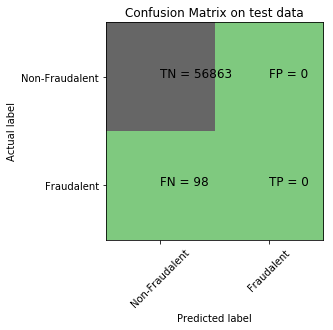

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.00      0.00      0.00        98

    accuracy                           1.00     56961
   macro avg       0.50      0.50      0.50     56961
weighted avg       1.00      1.00      1.00     56961

Accuarcy of Logistic model with l2 regularisation : 0.9899755973385299
Confusion Matrix


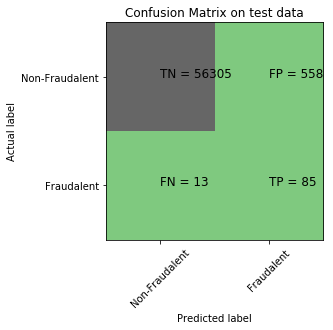

classification Report
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56863
           1       0.13      0.87      0.23        98

    accuracy                           0.99     56961
   macro avg       0.57      0.93      0.61     56961
weighted avg       1.00      0.99      0.99     56961

l2 roc_value: 0.9805944254845247
l2 threshold: 0.27317082258961495
ROC for the test dataset 98.1%


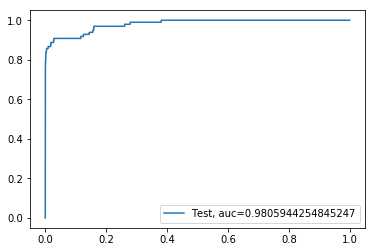

l1 roc_value: 0.5
l1 threshold: 1.5
ROC for the test dataset 50.0%


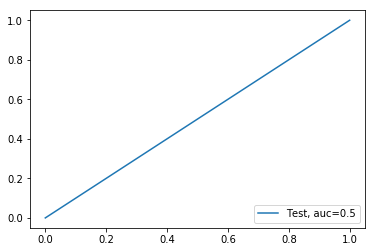

Time Taken by Model: --- 438.8839087486267 seconds ---
--------------------------------------------------------------------------------


In [ ]:
Handle_data_imbalance= "Random Oversampling with StratifiedKFold CV "
#Run Logistic Regression with L1 And L2 Regularisation
print("Logistic Regression with L1 And L2 Regularisation")
start_time = time.time()
df_Results = Run_logistic_models(df_Results , Handle_data_imbalance , X_over, y_over, X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )


### Similarly explore other algorithms on balanced dataset by building models like:
- KNN
- SVM
- Decision Tree
- Random Forest
- XGBoost

KNN Model
model score
0.9987184213760292
Confusion Matrix


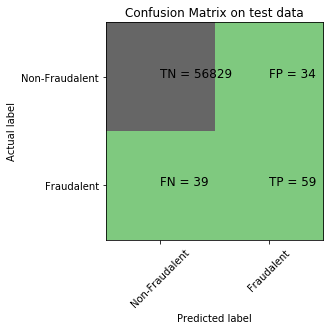

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.63      0.60      0.62        98

    accuracy                           1.00     56961
   macro avg       0.82      0.80      0.81     56961
weighted avg       1.00      1.00      1.00     56961

KNN roc_value: 0.8109839366870678
KNN threshold: 0.2
ROC for the test dataset 81.1%


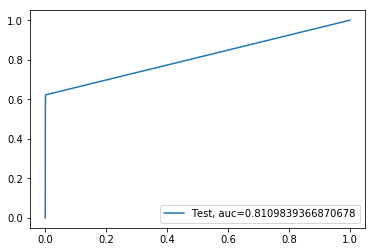

Time Taken by Model: --- -1475574021.3065393 minutes ---


In [ ]:
#Run KNN Model
print("KNN Model")
start_time = time.time()
df_Results = buildAndRunKNNModels(df_Results , Handle_data_imbalance,X_over, y_over, X_test, y_test)
print("Time Taken by Model: --- %s minutes ---" % (time.time()/12 - start_time))
print('='*90 )


Decision Tree Models with  'gini' & 'entropy' criteria
gini score: 0.9991397622934991
Confusion Matrix


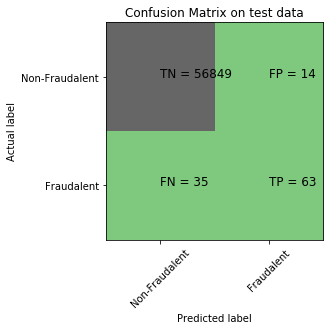

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.82      0.64      0.72        98

    accuracy                           1.00     56961
   macro avg       0.91      0.82      0.86     56961
weighted avg       1.00      1.00      1.00     56961

gini tree_roc_value: 0.8213054685321362
Tree threshold: 1.0
ROC for the test dataset 82.1%


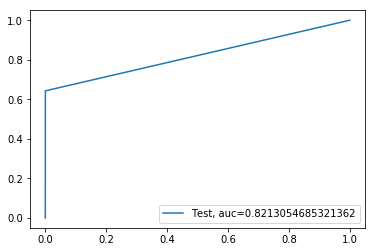

entropy score: 0.9990344270641316
Confusion Matrix


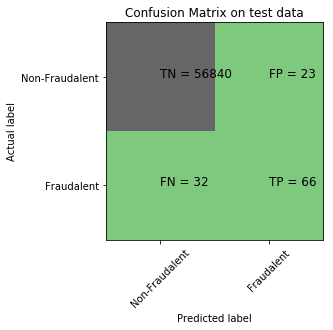

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.74      0.67      0.71        98

    accuracy                           1.00     56961
   macro avg       0.87      0.84      0.85     56961
weighted avg       1.00      1.00      1.00     56961

entropy tree_roc_value: 0.836532453404836
Tree threshold: 1.0
ROC for the test dataset 83.7%


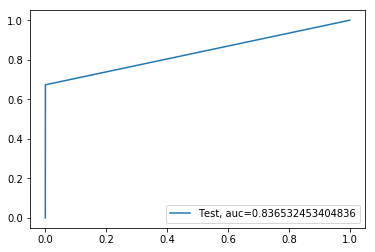

Time Taken by Model: --- 20.579835414886475 seconds ---
--------------------------------------------------------------------------------


In [ ]:
#Run Decision Tree Models with  'gini' & 'entropy' criteria
print("Decision Tree Models with  'gini' & 'entropy' criteria")
start_time = time.time()
df_Results = buildAndRunTreeModels(df_Results , Handle_data_imbalance,X_over, y_over, X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )


Random Forest Model
Model Accuracy: 0.9994557679816014
Confusion Matrix


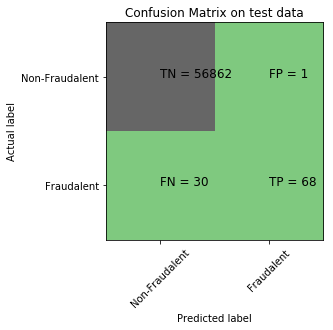

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.99      0.69      0.81        98

    accuracy                           1.00     56961
   macro avg       0.99      0.85      0.91     56961
weighted avg       1.00      1.00      1.00     56961

Random Forest roc_value: 0.931356855916135
Random Forest threshold: 0.01
ROC for the test dataset 93.1%


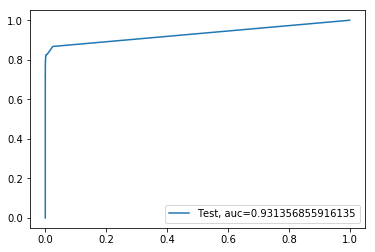

Time Taken by Model: --- 141.86368489265442 seconds ---
--------------------------------------------------------------------------------


In [ ]:
#Run Random Forest Model
print("Random Forest Model")
start_time = time.time()
df_Results = buildAndRunRandomForestModels(df_Results , Handle_data_imbalance,X_over, y_over, X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )


XGBoost Model
[00:23:04] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Model Accuracy: 0.999490879724724
Confusion Matrix


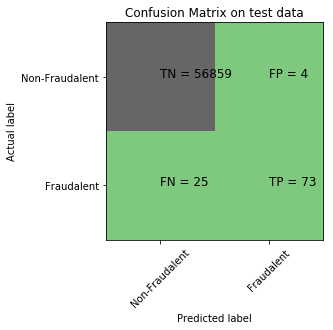

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.95      0.74      0.83        98

    accuracy                           1.00     56961
   macro avg       0.97      0.87      0.92     56961
weighted avg       1.00      1.00      1.00     56961

XGboost ROC value: 0.9761731293294624
XGBoost threshold: 0.00010935581667581573
ROC for the test dataset 97.6%


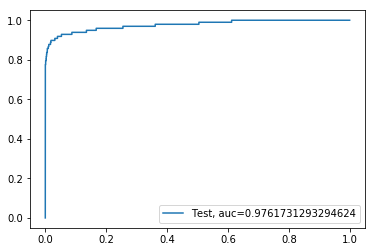

Time Taken by Model: --- 77.5103931427002 seconds ---
--------------------------------------------------------------------------------


In [ ]:
#Run XGBoost Model
print("XGBoost Model")
start_time = time.time()
df_Results = Run_XGBoost_Models(df_Results , Handle_data_imbalance,X_over, y_over, X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )


In [ ]:
#Run SVM Model with Sigmoid Kernel
#print("SVM Model with Sigmoid Kernel")
#start_time = time.time()
#df_Results = buildAndRunSVMModels(df_Results , Handle_data_imbalance,X_over, y_over, X_test, y_test)
#print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))

In [ ]:
df_Results

,Handle_data_imbalance,Model,Accuracy,roc_value,threshold
0,Random Undersampling,Logistic Regression with L2 Regularisation,0.997556,0.985667,0.192126
1,Random Undersampling,Logistic Regression with L1 Regularisation,0.998273,0.500000,1.500000
2,Random Undersampling,KNN,0.977655,0.952956,0.400000
3,Random Undersampling,Tree Model with gini criteria,0.949552,0.909804,1.000000
4,Random Undersampling,Tree Model with entropy criteria,0.950718,0.914446,1.000000
5,Random Undersampling,Random Forest,0.990408,0.977218,0.580000
6,Random Undersampling,XGBoost,0.984607,0.978560,0.425812
7,Random Undersampling,SVM,0.652229,0.544575,0.335908
8,Random Oversampling with StratifiedKFold CV,Logistic Regression with L2 Regularisation,0.989976,0.980594,0.273171
9,Random Oversampling with StratifiedKFold CV,Logistic Regression with L1 Regularisation,0.998280,0.500000,1.500000


## Results for Random Oversampling: 

**Random Oversampling looks much better than undersampling and cause good change in prediction for XGBoost**
Based on Accuracy and ROC value the XGBoost has given the best results 

### Similarly explore other algorithms on balanced dataset by building models like:
- KNN
- SVM
- Decision Tree
- Random Forest
- XGBoost

# Oversampling using  SMOTE Oversampling method

**Using same approach as RandomOverSampler above to do SMOTE oversampling**


### Print the class distribution after applying SMOTE

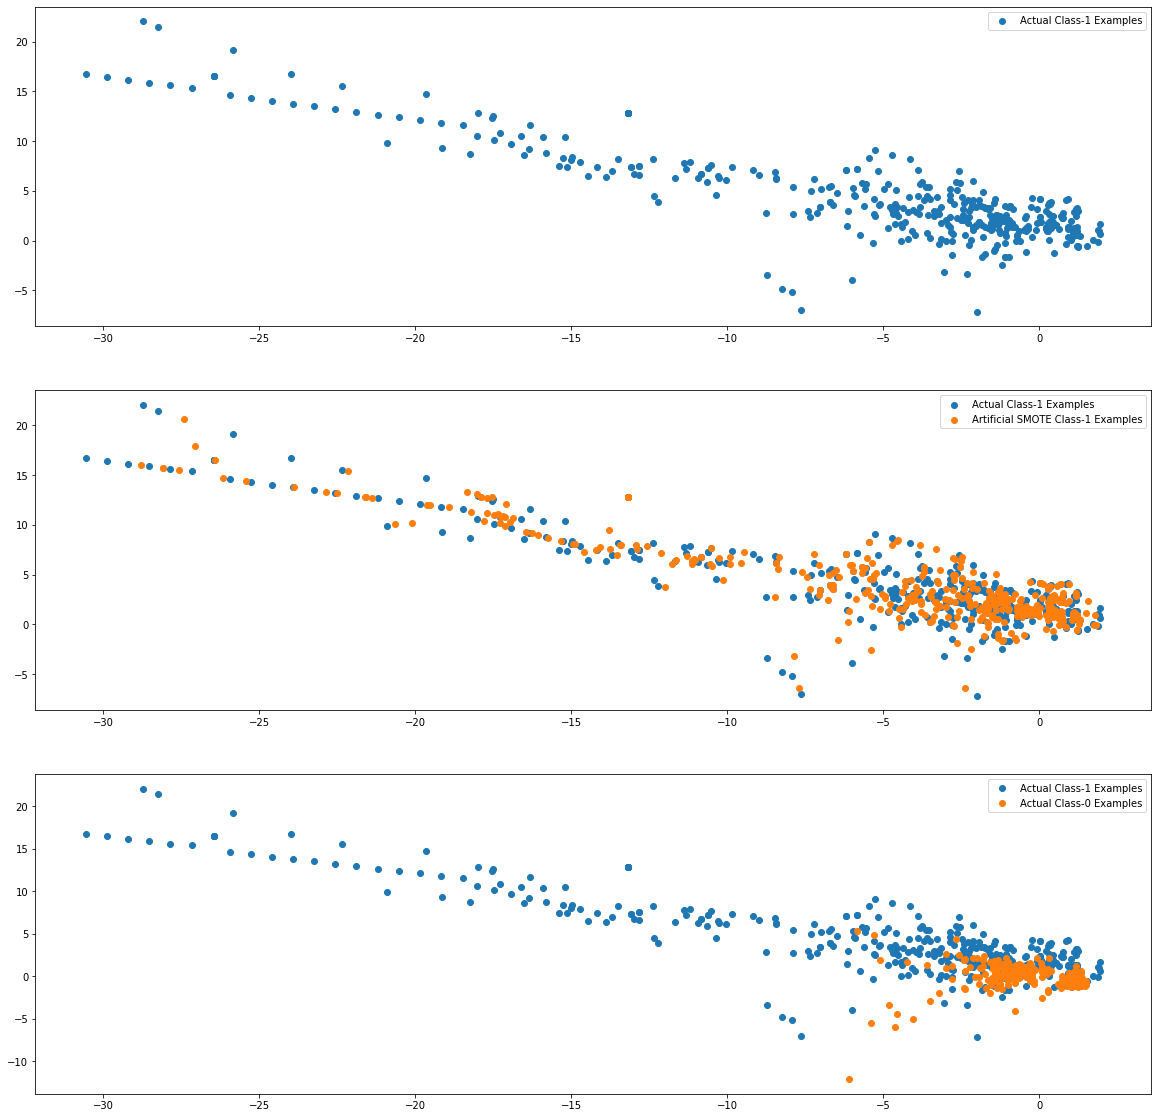

In [38]:
import warnings
import pandas
warnings.filterwarnings("ignore")

from imblearn import over_sampling
SMOTE = over_sampling.SMOTE(random_state=0)

X_train_Smote, y_train_Smote= SMOTE.fit_sample(X_train, y_train) 

#Create dataframe
#X_train_Smote = pd.DataFrame(data=X_train_Smote,   columns=cols)
# Artificial minority samples and corresponding minority labels from SMOTE are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from SMOTE, we do
X_train_smote_1 = X_train_Smote[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]


plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_smote_1[:X_train_1.shape[0], 0], X_train_smote_1[:X_train_1.shape[0], 1],
            label='Artificial SMOTE Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()


#Create dataframe
X_train_Smote = pd.DataFrame(data=X_train_Smote,   columns=get_cols)

In [39]:
from sklearn.model_selection import StratifiedKFold
from imblearn import over_sampling

skf = StratifiedKFold(n_splits=5, random_state=None)

for fold, (train_index, test_index) in enumerate(skf.split(X,y), 1):
    X_train = X.loc[train_index]
    y_train = y.loc[train_index] 
    X_test = X.loc[test_index]
    y_test = y.loc[test_index]  
    SMOTE = over_sampling.SMOTE(random_state=0)
    X_train_Smote, y_train_Smote= SMOTE.fit_sample(X_train, y_train)
  
#Create Dataframe for X_over
X_train_Smote = pd.DataFrame(data=X_train_Smote,   columns=get_cols)

Logistic Regression with L1 And L2 Regularisation
Max AUR_ROC for l1: 0.5
Max AUR_ROC for l2: 0.9929639522219997
Parameters for l1 regularisations
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0.]]
[0.]
{1: array([[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0

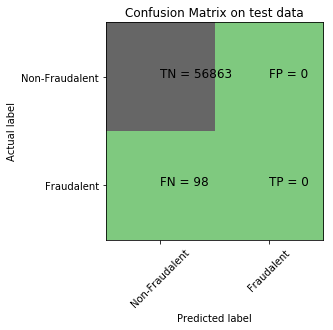

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.00      0.00      0.00        98

    accuracy                           1.00     56961
   macro avg       0.50      0.50      0.50     56961
weighted avg       1.00      1.00      1.00     56961

Accuarcy of Logistic model with l2 regularisation : 0.9839012657783396
Confusion Matrix


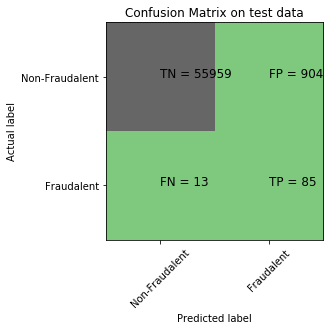

classification Report
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56863
           1       0.09      0.87      0.16        98

    accuracy                           0.98     56961
   macro avg       0.54      0.93      0.57     56961
weighted avg       1.00      0.98      0.99     56961

l2 roc_value: 0.9755909926005468
l2 threshold: 0.381323391351041
ROC for the test dataset 97.6%


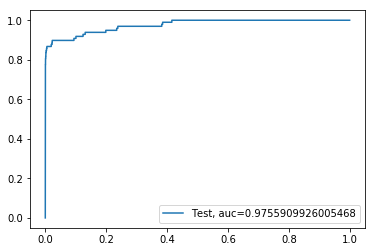

l1 roc_value: 0.5
l1 threshold: 1.5
ROC for the test dataset 50.0%


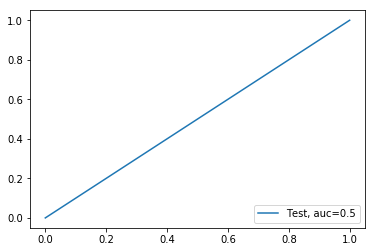

Time Taken by Model: --- 624.7417352199554 seconds ---
--------------------------------------------------------------------------------


In [ ]:
Handle_data_imbalance = "SMOTE Oversampling with StratifiedKFold CV "
#Run Logistic Regression with L1 And L2 Regularisation
print("Logistic Regression with L1 And L2 Regularisation")
start_time = time.time()
df_Results = Run_logistic_models(df_Results, Handle_data_imbalance, X_train_Smote, y_train_Smote , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
 

### Similarly explore other algorithms on balanced dataset by building models like:
- KNN
- SVM
- Decision Tree
- Random Forest
- XGBoost

KNN Model
model score
0.9962079317427713
Confusion Matrix


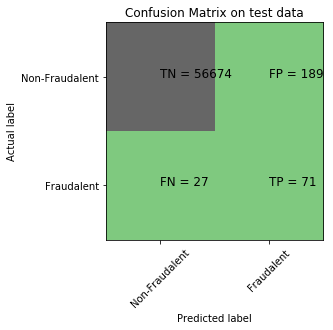

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.27      0.72      0.40        98

    accuracy                           1.00     56961
   macro avg       0.64      0.86      0.70     56961
weighted avg       1.00      1.00      1.00     56961

KNN roc_value: 0.8711781126639144
KNN threshold: 0.2
ROC for the test dataset 87.1%


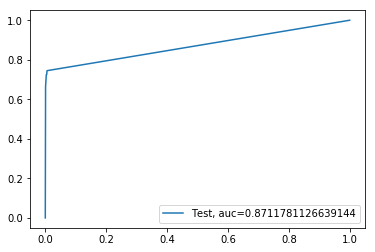

Time Taken by Model: --- 3198.819230079651 seconds ---
--------------------------------------------------------------------------------


In [ ]:
#Run KNN Model
print("KNN Model")
start_time = time.time()
df_Results = buildAndRunKNNModels(df_Results, Handle_data_imbalance, X_train_Smote, y_train_Smote , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )


Decision Tree Models with  'gini' & 'entropy' criteria
gini score: 0.9980512982567019
Confusion Matrix


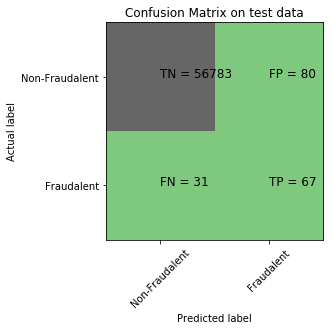

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.46      0.68      0.55        98

    accuracy                           1.00     56961
   macro avg       0.73      0.84      0.77     56961
weighted avg       1.00      1.00      1.00     56961

gini tree_roc_value: 0.8411332895713902
Tree threshold: 1.0
ROC for the test dataset 84.1%


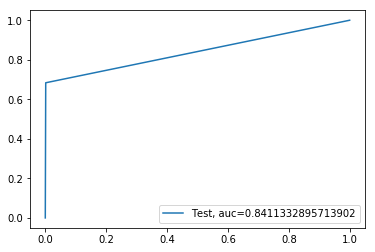

entropy score: 0.9983146363301206
Confusion Matrix


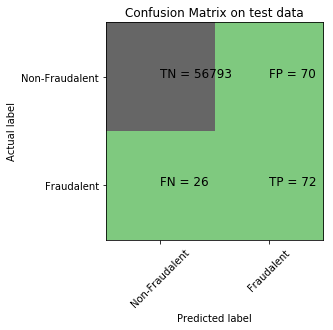

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.51      0.73      0.60        98

    accuracy                           1.00     56961
   macro avg       0.75      0.87      0.80     56961
weighted avg       1.00      1.00      1.00     56961

entropy tree_roc_value: 0.8667314242933337
Tree threshold: 1.0
ROC for the test dataset 86.7%


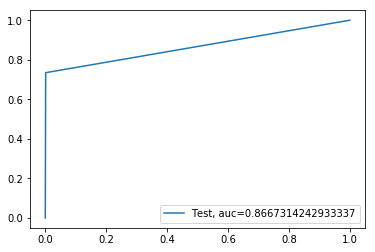

Time Taken by Model: --- 64.6788067817688 seconds ---
--------------------------------------------------------------------------------


In [ ]:
#Run Decision Tree Models with  'gini' & 'entropy' criteria
print("Decision Tree Models with  'gini' & 'entropy' criteria")
start_time = time.time()
df_Results = buildAndRunTreeModels(df_Results, Handle_data_imbalance, X_train_Smote, y_train_Smote , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )


Random Forest Model
Model Accuracy: 0.9995611032109689
Confusion Matrix


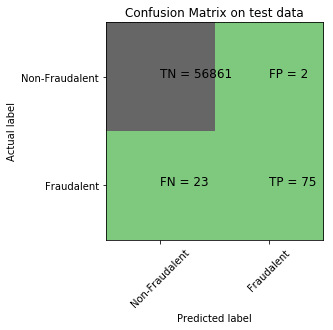

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.97      0.77      0.86        98

    accuracy                           1.00     56961
   macro avg       0.99      0.88      0.93     56961
weighted avg       1.00      1.00      1.00     56961

Random Forest roc_value: 0.9474941023663391
Random Forest threshold: 0.03
ROC for the test dataset 94.7%


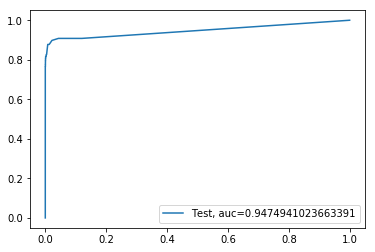

Time Taken by Model: --- 314.6472668647766 seconds ---
--------------------------------------------------------------------------------


In [ ]:
#Run Random Forest Model
print("Random Forest Model")
start_time = time.time()
df_Results = buildAndRunRandomForestModels(df_Results, Handle_data_imbalance, X_train_Smote, y_train_Smote , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )


XGBoost Model
[01:48:44] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Model Accuracy: 0.999420656238479
Confusion Matrix


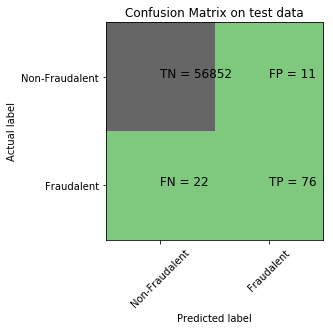

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.87      0.78      0.82        98

    accuracy                           1.00     56961
   macro avg       0.94      0.89      0.91     56961
weighted avg       1.00      1.00      1.00     56961

XGboost ROC value: 0.9815977320355009
XGBoost threshold: 0.0002705000515561551
ROC for the test dataset 98.2%


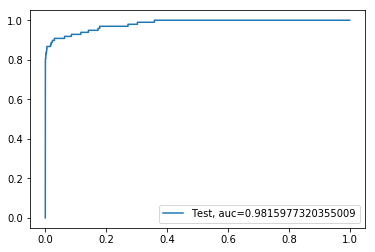

Time Taken by Model: --- 148.53164720535278 seconds ---
--------------------------------------------------------------------------------


In [ ]:
#Run XGBoost Model
print("XGBoost Model")
start_time = time.time()
df_Results = Run_XGBoost_Models(df_Results, Handle_data_imbalance, X_train_Smote, y_train_Smote , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

##### Build models on other algorithms to see the better performing on SMOTE

In [ ]:
df_Results

,Handle_data_imbalance,Model,Accuracy,roc_value,threshold
0,Random Undersampling,Logistic Regression with L2 Regularisation,0.997556,0.985667,0.192126
1,Random Undersampling,Logistic Regression with L1 Regularisation,0.998273,0.500000,1.500000
2,Random Undersampling,KNN,0.977655,0.952956,0.400000
3,Random Undersampling,Tree Model with gini criteria,0.949552,0.909804,1.000000
4,Random Undersampling,Tree Model with entropy criteria,0.950718,0.914446,1.000000
5,Random Undersampling,Random Forest,0.990408,0.977218,0.580000
6,Random Undersampling,XGBoost,0.984607,0.978560,0.425812
7,Random Undersampling,SVM,0.652229,0.544575,0.335908
8,Random Oversampling with StratifiedKFold CV,Logistic Regression with L2 Regularisation,0.989976,0.980594,0.273171
9,Random Oversampling with StratifiedKFold CV,Logistic Regression with L1 Regularisation,0.998280,0.500000,1.500000


## Results for SMOTE Oversampling: 

Similar to Random sampling the accuracy and ROC value we have XGBoost provided best results for SMOTE oversampling technique

# Using with ADASYN Oversampling method

**Using same approach as RandomOverSampler and SMOTE above to do ADASYN oversampling**


### Print the class distribution after applying ADASYN

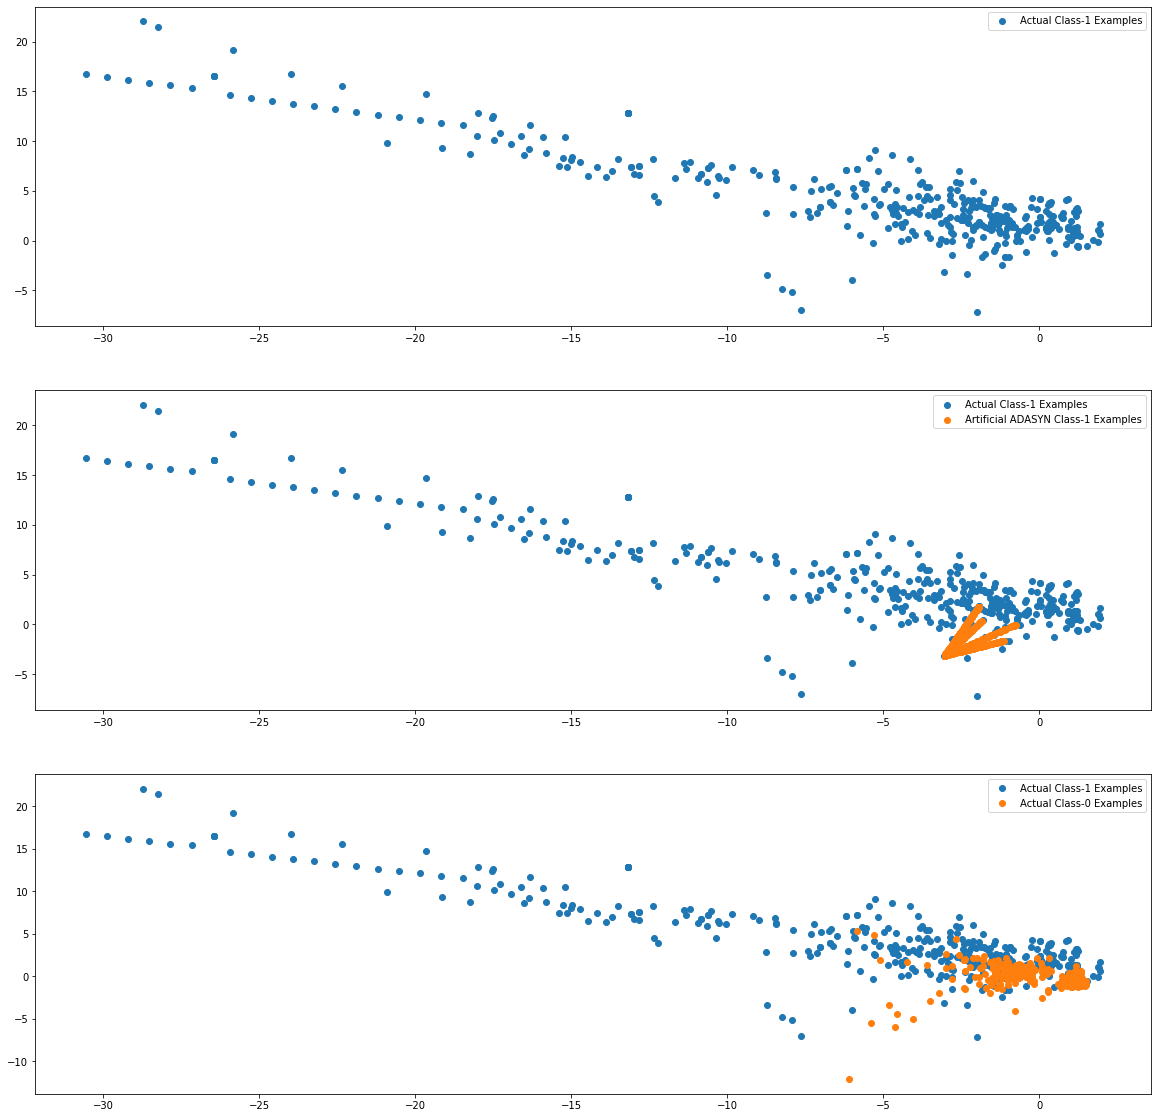

In [40]:
import warnings
warnings.filterwarnings("ignore")

from imblearn import over_sampling

ADASYN = over_sampling.ADASYN(random_state=0)
X_train_ADASYN, y_train_ADASYN = ADASYN.fit_sample(X_train, y_train) 

# Artificial minority samples and corresponding minority labels from ADASYN are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from ADASYN, we do
X_train_adasyn_1 = X_train_ADASYN[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]


import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_adasyn_1[:X_train_1.shape[0], 0], X_train_adasyn_1[:X_train_1.shape[0], 1],
            label='Artificial ADASYN Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()



In [41]:
from sklearn.model_selection import StratifiedKFold
from imblearn import over_sampling

skf = StratifiedKFold(n_splits=5, random_state=None)

for fold, (train_index, test_index) in enumerate(skf.split(X,y), 1):
    X_train = X.loc[train_index]
    y_train = y.loc[train_index] 
    X_test = X.loc[test_index]
    y_test = y.loc[test_index]  
    SMOTE = over_sampling.SMOTE(random_state=0)
    X_train_ADASYN, y_train_ADASYN= ADASYN.fit_sample(X_train, y_train)
  
 #Create Dataframe for X_over
X_train_ADASYN = pd.DataFrame(data=X_train_ADASYN,   columns=get_cols)

### Similarly explore other algorithms on balanced dataset by building models like:
- KNN
- SVM
- Decision Tree
- Random Forest
- XGBoost

##### Build models on other algorithms to see the better performing on ADASYN

Logistic Regression with L1 And L2 Regularisation
Max AUR_ROC for l1: 0.5
Max AUR_ROC for l2: 0.9812206975585775
Parameters for l1 regularisations
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0.]]
[0.]
{1: array([[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0

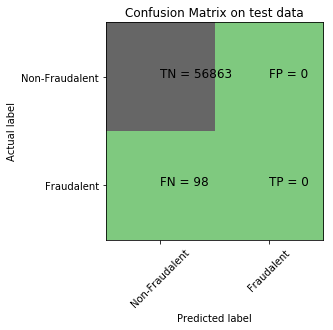

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.00      0.00      0.00        98

    accuracy                           1.00     56961
   macro avg       0.50      0.50      0.50     56961
weighted avg       1.00      1.00      1.00     56961

Accuarcy of Logistic model with l2 regularisation : 0.9601130598128544
Confusion Matrix


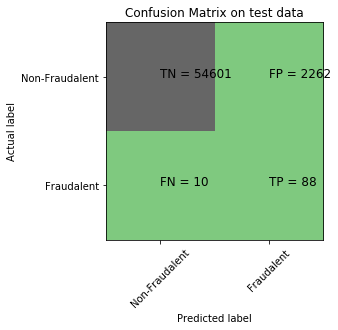

classification Report
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     56863
           1       0.04      0.90      0.07        98

    accuracy                           0.96     56961
   macro avg       0.52      0.93      0.53     56961
weighted avg       1.00      0.96      0.98     56961

l2 roc_value: 0.9753512470179848
l2 threshold: 0.6324896188019592
ROC for the test dataset 97.5%


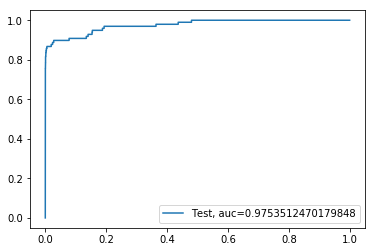

l1 roc_value: 0.5
l1 threshold: 1.5
ROC for the test dataset 50.0%


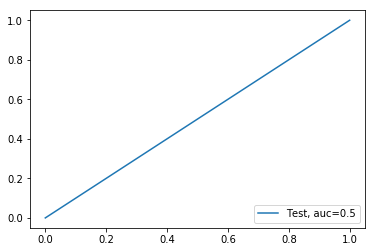

Time Taken by Model: --- 649.3604688644409 seconds ---
--------------------------------------------------------------------------------


In [ ]:
Handle_data_imbalance = "ADASYN Oversampling with StratifiedKFold CV "
#Run Logistic Regression with L1 And L2 Regularisation
print("Logistic Regression with L1 And L2 Regularisation")
start_time = time.time()
df_Results = Run_logistic_models(df_Results, Handle_data_imbalance, X_train_ADASYN, y_train_ADASYN , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

 

KNN Model
model score
0.9958392584399852
Confusion Matrix


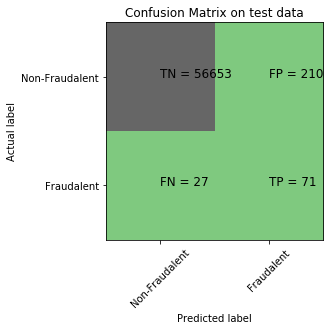

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.25      0.72      0.37        98

    accuracy                           1.00     56961
   macro avg       0.63      0.86      0.69     56961
weighted avg       1.00      1.00      1.00     56961

KNN roc_value: 0.8711282254843093
KNN threshold: 0.2
ROC for the test dataset 87.1%


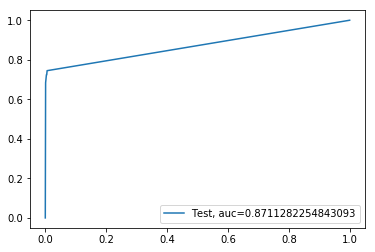

Time Taken by Model: --- 2784.6291880607605 seconds ---
--------------------------------------------------------------------------------


In [ ]:
#Run KNN Model
print("KNN Model")
start_time = time.time()
df_Results = buildAndRunKNNModels(df_Results, Handle_data_imbalance,X_train_ADASYN, y_train_ADASYN , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )


Decision Tree Models with  'gini' & 'entropy' criteria
gini score: 0.9979284071557732
Confusion Matrix


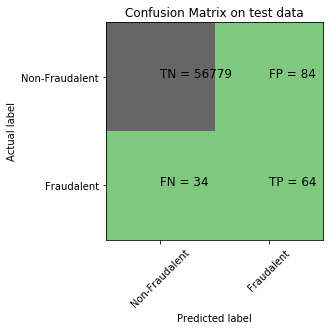

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.43      0.65      0.52        98

    accuracy                           1.00     56961
   macro avg       0.72      0.83      0.76     56961
weighted avg       1.00      1.00      1.00     56961

gini tree_roc_value: 0.8257919948662862
Tree threshold: 1.0
ROC for the test dataset 82.6%


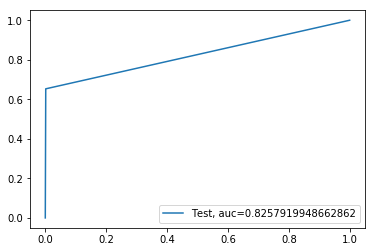

entropy score: 0.9984375274310493
Confusion Matrix


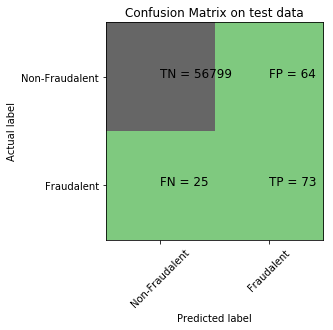

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.53      0.74      0.62        98

    accuracy                           1.00     56961
   macro avg       0.77      0.87      0.81     56961
weighted avg       1.00      1.00      1.00     56961

entropy tree_roc_value: 0.8718862234938468
Tree threshold: 1.0
ROC for the test dataset 87.2%


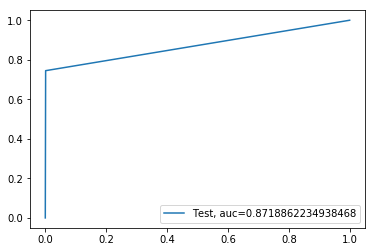

Time Taken by Model: --- 69.65557622909546 seconds ---
--------------------------------------------------------------------------------


In [ ]:
#Run Decision Tree Models with  'gini' & 'entropy' criteria
print("Decision Tree Models with  'gini' & 'entropy' criteria")
start_time = time.time()
df_Results = buildAndRunTreeModels(df_Results, Handle_data_imbalance,X_train_ADASYN, y_train_ADASYN , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )


Random Forest Model
Model Accuracy: 0.999490879724724
Confusion Matrix


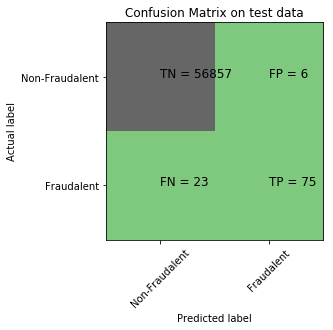

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.93      0.77      0.84        98

    accuracy                           1.00     56961
   macro avg       0.96      0.88      0.92     56961
weighted avg       1.00      1.00      1.00     56961

Random Forest roc_value: 0.9424467041622059
Random Forest threshold: 0.03
ROC for the test dataset 94.2%


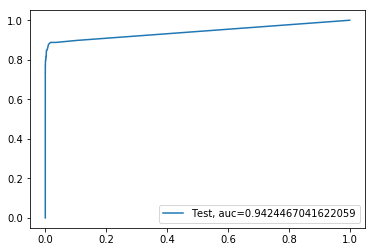

Time Taken by Model: --- 362.808940410614 seconds ---
--------------------------------------------------------------------------------


In [ ]:
#Run Random Forest Model
print("Random Forest Model")
start_time = time.time()
df_Results = buildAndRunRandomForestModels(df_Results, Handle_data_imbalance,X_train_ADASYN, y_train_ADASYN , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )


XGBoost Model
[02:56:23] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Model Accuracy: 0.9992977651375503
Confusion Matrix


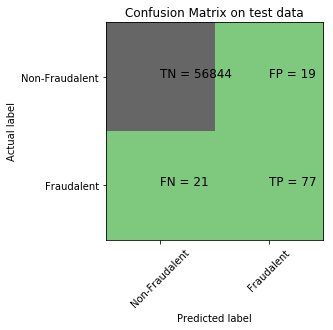

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.80      0.79      0.79        98

    accuracy                           1.00     56961
   macro avg       0.90      0.89      0.90     56961
weighted avg       1.00      1.00      1.00     56961

XGboost ROC value: 0.9748109222057885
XGBoost threshold: 0.00023749757383484393
ROC for the test dataset 97.5%


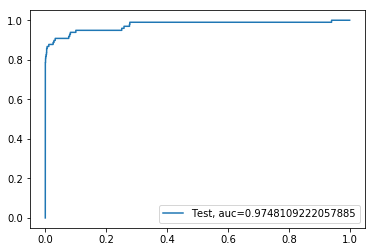

Time Taken by Model: --- 158.4483118057251 seconds ---
--------------------------------------------------------------------------------


In [ ]:
#Run XGBoost Model
print("XGBoost Model")
start_time = time.time()
df_Results = Run_XGBoost_Models(df_Results, Handle_data_imbalance,X_train_ADASYN, y_train_ADASYN , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

In [ ]:
df_Results

,Handle_data_imbalance,Model,Accuracy,roc_value,threshold
0,Random Undersampling,Logistic Regression with L2 Regularisation,0.997556,0.985667,0.192126
1,Random Undersampling,Logistic Regression with L1 Regularisation,0.998273,0.500000,1.500000
2,Random Undersampling,KNN,0.977655,0.952956,0.400000
3,Random Undersampling,Tree Model with gini criteria,0.949552,0.909804,1.000000
4,Random Undersampling,Tree Model with entropy criteria,0.950718,0.914446,1.000000
5,Random Undersampling,Random Forest,0.990408,0.977218,0.580000
6,Random Undersampling,XGBoost,0.984607,0.978560,0.425812
7,Random Undersampling,SVM,0.652229,0.544575,0.335908
8,Random Oversampling with StratifiedKFold CV,Logistic Regression with L2 Regularisation,0.989976,0.980594,0.273171
9,Random Oversampling with StratifiedKFold CV,Logistic Regression with L1 Regularisation,0.998280,0.500000,1.500000


## ADASYN Results with oversampling: 

Similar to Random sampling and SMOTE again XGBoost which has provided best results for ADASYN oversampling technique

### Select the oversampling method which shows the best result on a model
- Apply the best hyperparameter on the model
- Predict on the test dataset

### My conclusion after running models on Oversampled data using all the 3 techniques: 

After running all the models XGBOOST model with Random Oversampling with StratifiedKFold CV has the best accuracy and ROC values, Hence i will use this model to further tune the hyperparameters and try to get even better results


### It's worth observig that Logistic Regression with L2 Regularisation & RepeatedKFold Cross Validation has   also produced very good results without  oversampling.

###### Doing parameter tuning for final XGBOOST model by handling class imbalance

In [ ]:
#Evaluate XGboost model
from xgboost import XGBClassifier
# fit model no training data
from sklearn.metrics import roc_auc_score
XGBmodel = XGBClassifier(random_state=42)
XGBmodel.fit(X_over, y_over)

XGB_test_score = XGBmodel.score(X_test, y_test)
print('Model Accuracy: {0}'.format(XGB_test_score))

# Probabilities for each class
XGB_probs = XGBmodel.predict_proba(X_test)[:, 1]

# Calculate roc auc
XGB_roc_value = roc_auc_score(y_test, XGB_probs)

print("XGboost roc_value: {0}" .format(XGB_roc_value))
fpr, tpr, thresholds = metrics.roc_curve(y_test, XGB_probs)
threshold = thresholds[np.argmax(tpr-fpr)]
print("XGBoost threshold: {0}".format(threshold))

[05:40:00] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Model Accuracy: 0.9994557679816014
XGboost roc_value: 0.9825746593943839
XGBoost threshold: 1.4843222743365914e-05


In [ ]:
#Evaluate XGboost model
from xgboost import XGBClassifier
# fit model no training data
XGBmodel = XGBClassifier(random_state=42)


In [ ]:
#Tune  XGBoost Model  to get the  max_depth and min_child_weight  

from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import GridSearchCV 
param_test = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}
gsearch1 = GridSearchCV(estimator = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1),param_grid = param_test, scoring='roc_auc',n_jobs=4, cv=5)

gsearch1.fit(X_over, y_over)
gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_

[06:50:22] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


({'mean_fit_time': array([128.95089364, 128.74088774, 128.33601909, 209.56964045,
         208.56146975, 209.14859266, 282.5333303 , 278.64426804,
         280.85336623, 334.33259845, 322.97331419, 297.16636605]),
  'std_fit_time': array([ 0.16231109,  0.20654227,  0.39827487,  0.6170109 ,  0.64602876,
          1.17483141,  2.00324343,  3.5130217 ,  2.48548431,  2.76234864,
          4.10040634, 26.86174024]),
  'mean_score_time': array([0.20163808, 0.19261208, 0.19071264, 0.29828734, 0.30467901,
         0.30189762, 0.41245198, 0.42225103, 0.41725025, 0.47398438,
         0.46464171, 0.41711664]),
  'std_score_time': array([0.00428385, 0.00914931, 0.00975261, 0.00668215, 0.00725779,
         0.01547988, 0.00684549, 0.02033393, 0.00733764, 0.02263556,
         0.00523946, 0.06664305]),
  'param_max_depth': masked_array(data=[3, 3, 3, 5, 5, 5, 7, 7, 7, 9, 9, 9],
               mask=[False, False, False, False, False, False, False, False,
                     False, False, False, False]

In [ ]:
#tune XGBoost Model for best n_estimators using best max_depth and min_child_weight

from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import GridSearchCV 
param_test = {
 'n_estimators':range(60,150,20)
}
gsearch1 = GridSearchCV(estimator = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=9,
              min_child_weight=5, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1),param_grid = param_test, scoring='roc_auc',n_jobs=4, cv=5)

gsearch1.fit(X_over, y_over)
gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_

[07:08:59] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


({'mean_fit_time': array([ 82.76687322, 110.05160131, 136.45399461, 160.50141721,
         168.95086074]),
  'std_fit_time': array([ 0.24182466,  0.295462  ,  0.33149345,  1.41189812, 26.7805248 ]),
  'mean_score_time': array([0.16478052, 0.18564925, 0.21212482, 0.22891273, 0.21235361]),
  'std_score_time': array([0.00766988, 0.00945784, 0.00720548, 0.00330894, 0.05157387]),
  'param_n_estimators': masked_array(data=[60, 80, 100, 120, 140],
               mask=[False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'n_estimators': 60},
   {'n_estimators': 80},
   {'n_estimators': 100},
   {'n_estimators': 120},
   {'n_estimators': 140}],
  'split0_test_score': array([0.99804673, 0.99905065, 0.99934518, 0.99942512, 0.99940443]),
  'split1_test_score': array([0.99930511, 0.99969077, 0.99986877, 0.99993355, 0.99995669]),
  'split2_test_score': array([0.99960207, 0.99981667, 0.9998992 , 0.99993925, 0.99995326]),
  'split3_test_score': array(

In [ ]:
# Further tune the parameters of max_depth ,  min_child_weight and n_estimators
#Lets tune XGBoost Model for n_estimators

from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import GridSearchCV 
param_test = {
 'n_estimators':[110,120,130],
  'max_depth':[2,3,4],
 'min_child_weight':[4,5,6]
}
gsearch1 = GridSearchCV(estimator = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=5, missing=None, n_estimators=120, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1), 
 param_grid = param_test, scoring='roc_auc',n_jobs=4, cv=5)gsearch1.fit(X_over, y_over)

gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_

[08:39:05] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


({'mean_fit_time': array([ 97.67697239, 107.24655366, 115.75595064,  98.17062111,
         108.56027837, 115.62146993,  97.02946768, 105.47475123,
         114.26310053, 142.64110603, 156.16240835, 168.42445235,
         141.7333868 , 154.89186063, 167.33523922, 145.33566546,
         158.5585041 , 169.70156584, 189.14808135, 203.58983746,
         222.74216347, 188.15196896, 204.71944656, 219.23776941,
         184.89675775, 201.95734806, 200.11215162]),
  'std_fit_time': array([ 0.09642824,  0.87891473,  0.93350758,  0.29092576,  0.86051389,
          0.11081305,  0.51582774,  0.12899115,  0.24928005,  0.39020278,
          0.17022649,  1.05271023,  0.58591926,  0.49915174,  0.5597006 ,
          1.97118675,  1.04523411,  0.20081501,  0.72610513,  0.41806012,
          1.21360498,  0.48671101,  0.31349013,  0.74186598,  0.39316479,
          0.62047277, 31.52659121]),
  'mean_score_time': array([0.16652465, 0.17847276, 0.18829551, 0.17029419, 0.17832522,
         0.18792391, 0.171303

In [ ]:
#Now take the previous best 'max_depth': 4, 'min_child_weight': 5 and 'n_estimators': 130 and find the best learning rate

# We will narror down the tunned parameters of max_depth ,  min_child_weight and n_estimators
#Lets tune XGBoost Model for n_estimators
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import GridSearchCV 
param_test = {
 'learning_rate':[0.05,0.1,0.125,0.15,0.2]
}

gsearch1 = GridSearchCV(estimator = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=5, missing=None, n_estimators=130, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1),param_grid = param_test, scoring='roc_auc',n_jobs=4, cv=5)

gsearch1.fit(X_over, y_over)
gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_

[09:06:14] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


({'mean_fit_time': array([226.29236751, 226.52535706, 224.43842621, 223.43684134,
         201.2441237 ]),
  'std_fit_time': array([ 0.49104982,  0.3606752 ,  2.03341062,  0.59646531, 37.39306543]),
  'mean_score_time': array([0.30997152, 0.29369445, 0.30075803, 0.28920121, 0.26163907]),
  'std_score_time': array([0.01178758, 0.01471079, 0.01274541, 0.01719087, 0.05866144]),
  'param_learning_rate': masked_array(data=[0.05, 0.1, 0.125, 0.15, 0.2],
               mask=[False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'learning_rate': 0.05},
   {'learning_rate': 0.1},
   {'learning_rate': 0.125},
   {'learning_rate': 0.15},
   {'learning_rate': 0.2}],
  'split0_test_score': array([0.99921949, 0.99941981, 0.99951197, 0.99964443, 0.99959956]),
  'split1_test_score': array([0.99991044, 0.99998927, 0.99999631, 0.99999953, 1.        ]),
  'split2_test_score': array([0.99992856, 0.999967  , 0.99996362, 0.99997745, 0.99997901]),
  'split3_t

In [ ]:
#Now take 'max_depth': 4, 'min_child_weight': 5, 'n_estimators': 130  , learning rate= '0.15' 
#parameters to tune the gamma parameters

from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import GridSearchCV 
param_test = {
'gamma':[i/10.0 for i in range(0,5)]
}
gsearch1 = GridSearchCV(estimator = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.15, max_delta_step=0, max_depth=4,
              min_child_weight=4, missing=None, n_estimators=130, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1), param_grid = param_test, scoring='roc_auc',n_jobs=4, cv=5)


gsearch1.fit(X_over, y_over)
gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_

[09:33:23] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


({'mean_fit_time': array([224.3453795 , 225.11613135, 223.88283606, 222.44929638,
         203.76258173]),
  'std_fit_time': array([ 0.94087109,  0.64427482,  1.48012368,  0.53065624, 38.39880654]),
  'mean_score_time': array([0.30554214, 0.30707612, 0.3161087 , 0.3103673 , 0.25842361]),
  'std_score_time': array([0.01615058, 0.00864939, 0.00335541, 0.01072392, 0.05559997]),
  'param_gamma': masked_array(data=[0.0, 0.1, 0.2, 0.3, 0.4],
               mask=[False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'gamma': 0.0},
   {'gamma': 0.1},
   {'gamma': 0.2},
   {'gamma': 0.3},
   {'gamma': 0.4}],
  'split0_test_score': array([0.99959956, 0.99962631, 0.99957344, 0.99965571, 0.99967256]),
  'split1_test_score': array([1.        , 1.        , 1.        , 1.        , 0.99999995]),
  'split2_test_score': array([0.99997901, 0.99998006, 0.99997709, 0.99997613, 0.9999749 ]),
  'split3_test_score': array([0.99994088, 0.99993745, 0.99993279, 0

In [ ]:
# Finally Evaluate XGboost model on test data using the best parameters which is derived from above hypertunning 


from xgboost import XGBClassifier

XGBmodel = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.1,
              learning_rate=0.2, max_delta_step=0, max_depth=4,
              min_child_weight=4, missing=None, n_estimators=130, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

XGBmodel.fit(X_over, y_over)

XGB_test_score = XGBmodel.score(X_test, y_test)
print('Model Accuracy: {0}'.format(XGB_test_score))

# Probabilities for each class
XGB_probs = XGBmodel.predict_proba(X_test)[:, 1]

# Calculate roc auc
XGB_roc_value = roc_auc_score(y_test, XGB_probs)

print("XGboost roc_value: {0}" .format(XGB_roc_value))
fpr, tpr, thresholds = metrics.roc_curve(y_test, XGB_probs)
threshold = thresholds[np.argmax(tpr-fpr)]
print("XGBoost threshold: {0}".format(threshold))

[09:36:03] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Model Accuracy: 0.9993855444953564
XGboost roc_value: 0.9830651867521185
XGBoost threshold: 0.0013493301812559366


In [ ]:
#Further tune the model to get best subsample and colsample_bytree 

from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import GridSearchCV 
param_test = {
 'subsample':[i/10.0 for i in range(7,10)],
 'colsample_bytree':[i/10.0 for i in range(7,10)]
}

gsearch1 = GridSearchCV(estimator = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.4,
              learning_rate=0.2, max_delta_step=0, max_depth=4,
              min_child_weight=4, missing=None, n_estimators=130, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1),param_grid = param_test, scoring='roc_auc',n_jobs=4, cv=5)

gsearch1.fit(X_over, y_over)
gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_

[10:09:44] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


({'mean_fit_time': array([137.54686995, 143.5643805 , 149.27134118, 150.30054622,
         158.37410126, 167.96906114, 167.24464788, 178.14314275,
         171.73640537]),
  'std_fit_time': array([ 0.74888225,  1.07316291,  0.7454471 ,  0.61027531,  0.42792048,
          0.67877621,  1.01427311,  0.26213104, 26.148178  ]),
  'mean_score_time': array([0.31197982, 0.3064817 , 0.30810432, 0.31216288, 0.30496459,
         0.30658498, 0.3085381 , 0.30613685, 0.23568044]),
  'std_score_time': array([0.01311765, 0.01247096, 0.00602768, 0.00348296, 0.00163335,
         0.00423037, 0.00364781, 0.00423029, 0.05767315]),
  'param_colsample_bytree': masked_array(data=[0.7, 0.7, 0.7, 0.8, 0.8, 0.8, 0.9, 0.9, 0.9],
               mask=[False, False, False, False, False, False, False, False,
                     False],
         fill_value='?',
              dtype=object),
  'param_subsample': masked_array(data=[0.7, 0.8, 0.9, 0.7, 0.8, 0.9, 0.7, 0.8, 0.9],
               mask=[False, False, False, F

In [44]:
#Evaluate XGboost model

from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

# fit model no training data
XGBmodel = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.8,
              colsample_bynode=1, colsample_bytree=1, gamma=0.1,
              learning_rate=0.2, max_delta_step=0, max_depth=4,
              min_child_weight=4, missing=None, n_estimators=130, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.8, verbosity=1)

XGBmodel.fit(X_over, y_over)

XGB_test_score = XGBmodel.score(X_test, y_test)
print('Model Accuracy: {0}'.format(XGB_test_score))

# Probabilities for each class
XGB_probs = XGBmodel.predict_proba(X_test)[:, 1]

# Calculate roc auc
XGB_roc_value = roc_auc_score(y_test, XGB_probs)

print("XGboost roc_value: {0}" .format(XGB_roc_value))
fpr, tpr, thresholds = metrics.roc_curve(y_test, XGB_probs)
threshold = thresholds[np.argmax(tpr-fpr)]
print("XGBoost threshold: {0}".format(threshold))

Model Accuracy: 0.999420656238479
XGboost roc_value: 0.9843761608190398
XGBoost threshold: 0.0011068459134548903


**The ROC value have dropped so will take new values of colsample_bytree': 0.8, 'subsample': 0.8**

In [46]:
# perform the best oversampling method on X_train & y_train

clf = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.1,
              learning_rate=0.2, max_delta_step=0, max_depth=4,
              min_child_weight=4, missing=None, n_estimators=130, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)
clf.fit(X_over, y_over ) # fit on the balanced dataset
XGB_test_score = clf.score(X_test, y_test)
print('Model Accuracy: {0}'.format(XGB_test_score))

# Probabilities for each class
XGB_probs = clf.predict_proba(X_test)[:, 1]

# Calculate roc auc
XGB_roc_value = roc_auc_score(y_test, XGB_probs)

print("XGboost roc_value: {0}" .format(XGB_roc_value))
fpr, tpr, thresholds = metrics.roc_curve(y_test, XGB_probs)
threshold = thresholds[np.argmax(tpr-fpr)]
print("XGBoost threshold: {0}".format(threshold))

Model Accuracy: 0.9994382121100402
XGboost roc_value: 0.9856436181915216
XGBoost threshold: 0.001495690201409161


### Print the important features of the best model to understand the dataset

Top var = 14
2nd Top var = 17
3rd Top var = 4


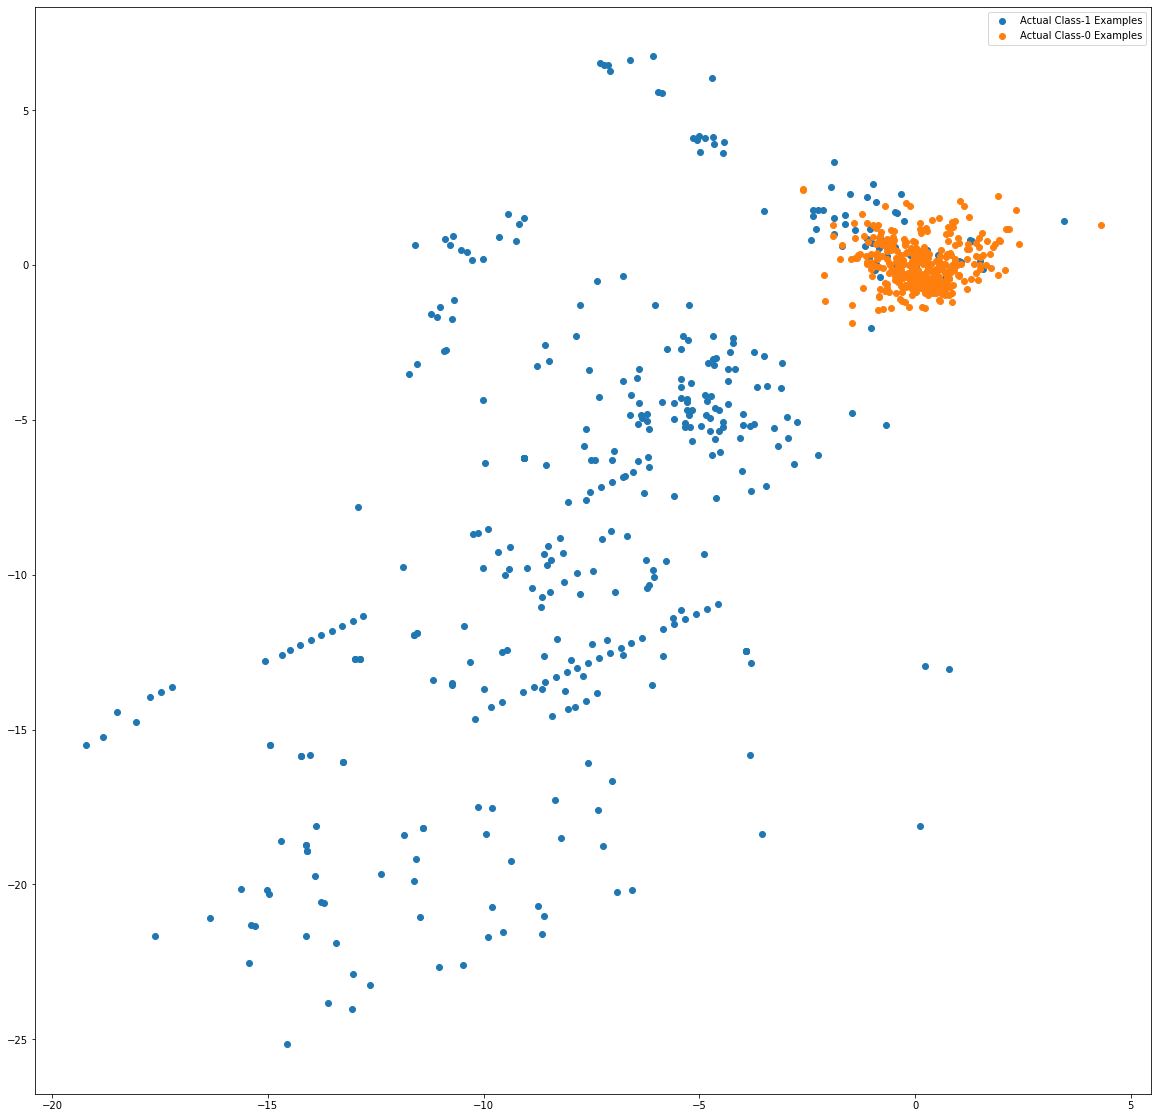

In [47]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-13 and Index-9 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

#### Print the FPR,TPR & select the best threshold from the roc curve

In [ ]:
# Calculate roc auc
XGB_roc_value = roc_auc_score(y_test, XGB_probs)

print("XGboost roc_value: {0}" .format(XGB_roc_value))
fpr, tpr, thresholds = metrics.roc_curve(y_test, XGB_probs)
threshold = thresholds[np.argmax(tpr-fpr)]
print("XGBoost threshold: {0}".format(threshold))

XGboost roc_value: 0.9830651867521185
XGBoost threshold: 0.0013493301812559366


## Final Model Selection:

### Overall Results after running various models on Undersampled and Oversampled data: 

Based on above results it is evident that XGBOOST model with Random Oversampling and StratifiedKFold CV method is giving the  best results. Hence i have tune the hyperparameters of this model to get best results

In the end i have selected XGBOOST model with Random Oversampling and StratifiedKFold CV 


**Model Accuracy: 0.9994382121100402**

**XGboost roc_value: 0.0.9830651867521185**

**XGBoost threshold: 0.0013493301812559366**

#### As previously mentioned I have also noticed that Logistic Regression with L2 Regularisation with RepeatedKFold Cross Validation has been provided best results without any oversampling.

